[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/olfataVz/analisis-data_prsa-air-quality/blob/main/notebook.ipynb)


# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Lalu Olfata Vedora Zurji
- **Email:** olfatavz@gmail.com
- **ID Dicoding:** MC253D5Y1872

## Pertanyaan Bisnis

1. Bagaimana pola distribusi polutan di berbagai lokasi berdasarkan analisis geospasial ?
2. Bagaimana pola konsentrasi polutan berdasarkan waktu menggunakan analisis clustering ?
3. Bagaimana pengaruh curah hujan terhadap polusi udara ? 

## Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data Wrangling

#### Gathering Data

In [2]:
# Tabel Aotizhongxin
aotizhongxin_df= pd.read_csv("data\\PRSA_Data_Aotizhongxin_20130301-20170228.csv")
aotizhongxin_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


Insight:
- Load data tabel csv Aotizhongxin

In [3]:
# Tabel Changping
changping_df = pd.read_csv("data\\PRSA_Data_Changping_20130301-20170228.csv")
changping_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


Insight:
- Load data tabel csv Changping

In [4]:
# Tabel Dingling
dingling_df = pd.read_csv("data\\PRSA_Data_Dingling_20130301-20170228.csv")
dingling_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


Insight:
- Load data tabel csv Dingling

In [5]:
# Tabel Dongsi
dongsi_df = pd.read_csv("data\\PRSA_Data_Dongsi_20130301-20170228.csv")
dongsi_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
2,3,2013,3,1,2,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi
3,4,2013,3,1,3,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi


Insight:
- Load data tabel csv Dongsi

In [6]:
# Tabel Guanyuan
guanyuan_df = pd.read_csv("data\\PRSA_Data_Guanyuan_20130301-20170228.csv")
guanyuan_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan


Insight:
- Load data tabel csv Guanyuan

In [7]:
# Tabel Gucheng
gucheng_df = pd.read_csv("data\\PRSA_Data_Gucheng_20130301-20170228.csv")
gucheng_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,18.0,5.0,NaN,800.0,88.0,0.1,1021.1,-18.6,0.0,NW,4.4,Gucheng
1,2,2013,3,1,1,6.0,15.0,5.0,NaN,800.0,88.0,-0.3,1021.5,-19.0,0.0,NW,4.0,Gucheng
2,3,2013,3,1,2,5.0,18.0,NaN,NaN,700.0,52.0,-0.7,1021.5,-19.8,0.0,WNW,4.6,Gucheng
3,4,2013,3,1,3,6.0,20.0,6.0,NaN,NaN,NaN,-1.0,1022.7,-21.2,0.0,W,2.8,Gucheng
4,5,2013,3,1,4,5.0,17.0,5.0,NaN,600.0,73.0,-1.3,1023.0,-21.4,0.0,WNW,3.6,Gucheng


Insight:
- Load data tabel csv Gucheng

In [8]:
# Tabel Huairou
huairou_df = pd.read_csv("data\\PRSA_Data_Huairou_20130301-20170228.csv")
huairou_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,7.0,7.0,3.0,2.0,100.0,91.0,-2.3,1020.3,-20.7,0.0,WNW,3.1,Huairou
1,2,2013,3,1,1,4.0,4.0,3.0,NaN,100.0,92.0,-2.7,1020.8,-20.5,0.0,NNW,1.5,Huairou
2,3,2013,3,1,2,4.0,4.0,NaN,NaN,100.0,91.0,-3.2,1020.6,-21.4,0.0,NW,1.8,Huairou
3,4,2013,3,1,3,3.0,3.0,3.0,2.0,NaN,NaN,-3.3,1021.3,-23.7,0.0,NNW,2.4,Huairou
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,300.0,86.0,-4.1,1022.1,-22.7,0.0,NNW,2.2,Huairou


Insight:
- Load data tabel csv Huairou

In [9]:
# Tabel Nongzhanguan
nongzhanguan_df = pd.read_csv("data\\PRSA_Data_Nongzhanguan_20130301-20170228.csv")
nongzhanguan_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan
1,2,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Nongzhanguan
2,3,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Nongzhanguan
3,4,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Nongzhanguan
4,5,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Nongzhanguan


Insight:
- Load data tabel csv Nongzhanguan

In [10]:
# Tabel Shunyi
shunyi_df = pd.read_csv("data\\PRSA_Data_Shunyi_20130301-20170228.csv")
shunyi_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,3,2013,3,1,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,4,2013,3,1,3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,5,2013,3,1,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi


Insight:
- Load data tabel csv Shunyi

In [11]:
# Tabel Tiantian
tiantian_df = pd.read_csv("data\\PRSA_Data_Tiantan_20130301-20170228.csv")
tiantian_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan


Insight:
- Load data tabel csv Tiantian

In [12]:
# Tabel Wanliu
wanliu_df = pd.read_csv("data\\PRSA_Data_Wanliu_20130301-20170228.csv")
wanliu_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,8.0,8.0,6.0,28.0,400.0,52.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Wanliu
1,2,2013,3,1,1,9.0,9.0,6.0,28.0,400.0,50.0,-1.1,1023.2,-18.2,0.0,N,4.7,Wanliu
2,3,2013,3,1,2,3.0,6.0,NaN,19.0,400.0,55.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Wanliu
3,4,2013,3,1,3,11.0,30.0,8.0,14.0,NaN,NaN,-1.4,1024.5,-19.4,0.0,NW,3.1,Wanliu
4,5,2013,3,1,4,3.0,13.0,9.0,NaN,300.0,54.0,-2.0,1025.2,-19.5,0.0,N,2.0,Wanliu


Insight:
- Load data tabel csv Wanliu

In [13]:
# Tabel Wanshouxigong
wanshouxigong_df = pd.read_csv("data\\PRSA_Data_Wanshouxigong_20130301-20170228.csv")
wanshouxigong_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,6.0,17.0,200.0,62.0,0.3,1021.9,-19.0,0.0,WNW,2.0,Wanshouxigong
1,2,2013,3,1,1,11.0,11.0,7.0,14.0,200.0,66.0,-0.1,1022.4,-19.3,0.0,WNW,4.4,Wanshouxigong
2,3,2013,3,1,2,8.0,8.0,NaN,16.0,200.0,59.0,-0.6,1022.6,-19.7,0.0,WNW,4.7,Wanshouxigong
3,4,2013,3,1,3,8.0,8.0,3.0,16.0,NaN,NaN,-0.7,1023.5,-20.9,0.0,NW,2.6,Wanshouxigong
4,5,2013,3,1,4,8.0,8.0,3.0,NaN,300.0,36.0,-0.9,1024.1,-21.7,0.0,WNW,2.5,Wanshouxigong


Insight:
- Load data tabel csv Wanshouxhigong

### Assessing Data

In [14]:
# Tabel Aotizhongxin
aotizhongxin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


Insight:
- Melakukan pengecekan tipe data pada tabel Aotizhongxin
- Terlihat tipe data sudah sesuai dengan label kolom pada csv

In [15]:
print(f"\nMissing Value:\n{aotizhongxin_df.isna().sum()}")
print(f"\nTotal Duplikasi Data: {aotizhongxin_df.duplicated().sum()}")


Missing Value:
No            0
year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

Total Duplikasi Data: 0


Insight:
- Melakukan pengecekan missing value pada tabel Aotizhongxin dan terdapat cukup banyak missing value
- Melakukan pengecekan duplikasi data dan tidak ditemukan adanya data yang terduplikasi

In [16]:
# Tabel Changping
changping_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34290 non-null  float64
 6   PM10     34482 non-null  float64
 7   SO2      34436 non-null  float64
 8   NO2      34397 non-null  float64
 9   CO       33543 non-null  float64
 10  O3       34460 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


Insight:
- Melakukan pengecekan tipe data pada tabel Changping
- Terlihat tipe data sudah sesuai dengan label kolom pada csv

In [17]:
print(f"\nMissing Value:\n{changping_df.isna().sum()}")
print(f"\nTotal Duplikasi Data: {changping_df.duplicated().sum()}")


Missing Value:
No            0
year          0
month         0
day           0
hour          0
PM2.5       774
PM10        582
SO2         628
NO2         667
CO         1521
O3          604
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

Total Duplikasi Data: 0


Insight:
- Melakukan pengecekan missing value pada tabel Changping dan terdapat cukup banyak missing value
- Melakukan pengecekan duplikasi data dan tidak ditemukan adanya data yang terduplikasi

In [18]:
# Tabel Dingling
dingling_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34285 non-null  float64
 6   PM10     34408 non-null  float64
 7   SO2      34334 non-null  float64
 8   NO2      33830 non-null  float64
 9   CO       33052 non-null  float64
 10  O3       33850 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


Insight:
- Melakukan pengecekan tipe data pada tabel Dingling
- Terlihat tipe data sudah sesuai dengan label kolom pada csv

In [19]:
print(f"\nMissing Value:\n{dingling_df.isna().sum()}")
print(f"\nTotal Duplikasi Data: {dingling_df.duplicated().sum()}")


Missing Value:
No            0
year          0
month         0
day           0
hour          0
PM2.5       779
PM10        656
SO2         730
NO2        1234
CO         2012
O3         1214
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

Total Duplikasi Data: 0


Insight:
- Melakukan pengecekan missing value pada tabel Dingling dan terdapat cukup banyak missing value
- Melakukan pengecekan duplikasi data dan tidak ditemukan adanya data yang terduplikasi

In [20]:
# Tabel Dongsi
dongsi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34314 non-null  float64
 6   PM10     34511 non-null  float64
 7   SO2      34401 non-null  float64
 8   NO2      33463 non-null  float64
 9   CO       31867 non-null  float64
 10  O3       34400 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


Insight:
- Melakukan pengecekan tipe data pada tabel Dongsi
- Terlihat tipe data sudah sesuai dengan label kolom pada csv

In [21]:
print(f"\nMissing Value:\n{dongsi_df.isna().sum()}")
print(f"\nTotal Duplikasi Data: {dongsi_df.duplicated().sum()}")


Missing Value:
No            0
year          0
month         0
day           0
hour          0
PM2.5       750
PM10        553
SO2         663
NO2        1601
CO         3197
O3          664
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

Total Duplikasi Data: 0


Insight:
- Melakukan pengecekan missing value pada tabel Dongsi dan terdapat cukup banyak missing value
- Melakukan pengecekan duplikasi data dan tidak ditemukan adanya data yang terduplikasi

In [22]:
# Tabel Guanyuan
guanyuan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34448 non-null  float64
 6   PM10     34635 non-null  float64
 7   SO2      34590 non-null  float64
 8   NO2      34405 non-null  float64
 9   CO       33311 non-null  float64
 10  O3       33891 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


Insight:
- Melakukan pengecekan tipe data pada tabel Guanyuan
- Terlihat tipe data sudah sesuai dengan label kolom pada csv

In [23]:
print(f"\nMissing Value:\n{guanyuan_df.isna().sum()}")
print(f"\nTotal Duplikasi Data: {guanyuan_df.duplicated().sum()}")


Missing Value:
No            0
year          0
month         0
day           0
hour          0
PM2.5       616
PM10        429
SO2         474
NO2         659
CO         1753
O3         1173
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

Total Duplikasi Data: 0


Insight:
- Melakukan pengecekan missing value pada tabel Guanyuan dan terdapat cukup banyak missing value
- Melakukan pengecekan duplikasi data dan tidak ditemukan adanya data yang terduplikasi

In [24]:
#Tabel Gucheng
gucheng_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34418 non-null  float64
 6   PM10     34683 non-null  float64
 7   SO2      34557 non-null  float64
 8   NO2      34396 non-null  float64
 9   CO       33663 non-null  float64
 10  O3       34335 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35013 non-null  float64
 14  RAIN     35021 non-null  float64
 15  wd       34905 non-null  object 
 16  WSPM     35022 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


Insight:
- Melakukan pengecekan tipe data pada tabel Gucheng
- Terlihat tipe data sudah sesuai dengan label kolom pada csv

In [25]:
print(f"\nMissing Value:\n{gucheng_df.isna().sum()}")
print(f"\nTotal Duplikasi Data: {gucheng_df.duplicated().sum()}")


Missing Value:
No            0
year          0
month         0
day           0
hour          0
PM2.5       646
PM10        381
SO2         507
NO2         668
CO         1401
O3          729
TEMP         51
PRES         50
DEWP         51
RAIN         43
wd          159
WSPM         42
station       0
dtype: int64

Total Duplikasi Data: 0


Insight:
- Melakukan pengecekan missing value pada tabel Gucheng dan terdapat cukup banyak missing value
- Melakukan pengecekan duplikasi data dan tidak ditemukan adanya data yang terduplikasi

In [26]:
# Tabel Huairou
huairou_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34111 non-null  float64
 6   PM10     34287 non-null  float64
 7   SO2      34084 non-null  float64
 8   NO2      33425 non-null  float64
 9   CO       33642 non-null  float64
 10  O3       33913 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35011 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35009 non-null  float64
 15  wd       34762 non-null  object 
 16  WSPM     35015 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


Insight:
- Melakukan pengecekan tipe data pada tabel Huairou
- Terlihat tipe data sudah sesuai dengan label kolom pada csv

In [27]:
print(f"\nMissing Value:\n{huairou_df.isna().sum()}")
print(f"\nTotal Duplikasi Data: {huairou_df.duplicated().sum()}")


Missing Value:
No            0
year          0
month         0
day           0
hour          0
PM2.5       953
PM10        777
SO2         980
NO2        1639
CO         1422
O3         1151
TEMP         51
PRES         53
DEWP         53
RAIN         55
wd          302
WSPM         49
station       0
dtype: int64

Total Duplikasi Data: 0


Insight:
- Melakukan pengecekan missing value pada tabel Huairou dan terdapat cukup banyak missing value
- Melakukan pengecekan duplikasi data dan tidak ditemukan adanya data yang terduplikasi

In [28]:
# Tabel Nongzhanguan
nongzhanguan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34436 non-null  float64
 6   PM10     34624 non-null  float64
 7   SO2      34618 non-null  float64
 8   NO2      34372 non-null  float64
 9   CO       33858 non-null  float64
 10  O3       34558 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


Insight:
- Melakukan pengecekan tipe data pada tabel Nongzhanguan
- Terlihat tipe data sudah sesuai dengan label kolom pada csv

In [29]:
print(f"\nMissing Value:\n{nongzhanguan_df.isna().sum()}")
print(f"\nTotal Duplikasi Data: {nongzhanguan_df.duplicated().sum()}")


Missing Value:
No            0
year          0
month         0
day           0
hour          0
PM2.5       628
PM10        440
SO2         446
NO2         692
CO         1206
O3          506
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

Total Duplikasi Data: 0


Insight:
- Melakukan pengecekan missing value pada tabel Nongzhanguan dan terdapat cukup banyak missing value
- Melakukan pengecekan duplikasi data dan tidak ditemukan adanya data yang terduplikasi

In [30]:
# Tabel Shunyi
shunyi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34151 non-null  float64
 6   PM10     34516 non-null  float64
 7   SO2      33768 non-null  float64
 8   NO2      33699 non-null  float64
 9   CO       32886 non-null  float64
 10  O3       33575 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35013 non-null  float64
 13  DEWP     35010 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34581 non-null  object 
 16  WSPM     35020 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


Insight:
- Melakukan pengecekan tipe data pada tabel Shunyi
- Terlihat tipe data sudah sesuai dengan label kolom pada csv

In [31]:
print(f"\nMissing Value:\n{shunyi_df.isna().sum()}")
print(f"\nTotal Duplikasi Data: {shunyi_df.duplicated().sum()}")


Missing Value:
No            0
year          0
month         0
day           0
hour          0
PM2.5       913
PM10        548
SO2        1296
NO2        1365
CO         2178
O3         1489
TEMP         51
PRES         51
DEWP         54
RAIN         51
wd          483
WSPM         44
station       0
dtype: int64



Total Duplikasi Data: 0


Insight:
- Melakukan pengecekan missing value pada tabel Shunyi dan terdapat cukup banyak missing value
- Melakukan pengecekan duplikasi data dan tidak ditemukan adanya data yang terduplikasi

In [32]:
# Tabel Tiantian
tiantian_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34387 non-null  float64
 6   PM10     34467 non-null  float64
 7   SO2      33946 non-null  float64
 8   NO2      34320 non-null  float64
 9   CO       33938 non-null  float64
 10  O3       34221 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


Insight:
- Melakukan pengecekan tipe data pada tabel Tiantian
- Terlihat tipe data sudah sesuai dengan label kolom pada csv

In [33]:
print(f"\nMissing Value:\n{tiantian_df.isna().sum()}")
print(f"\nTotal Duplikasi Data: {tiantian_df.duplicated().sum()}")


Missing Value:
No            0
year          0
month         0
day           0
hour          0
PM2.5       677
PM10        597
SO2        1118
NO2         744
CO         1126
O3          843
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

Total Duplikasi Data: 0


Insight:
- Melakukan pengecekan missing value pada tabel Tiantian dan terdapat cukup banyak missing value
- Melakukan pengecekan duplikasi data dan tidak ditemukan adanya data yang terduplikasi

In [34]:
# Tabel Wanliu
wanliu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34682 non-null  float64
 6   PM10     34780 non-null  float64
 7   SO2      34489 non-null  float64
 8   NO2      33994 non-null  float64
 9   CO       33252 non-null  float64
 10  O3       32957 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34941 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


Insight:
- Melakukan pengecekan tipe data pada tabel Wanliu
- Terlihat tipe data sudah sesuai dengan label kolom pada csv

In [35]:
print(f"\nMissing Value:\n{wanliu_df.isna().sum()}")
print(f"\nTotal Duplikasi Data: {wanliu_df.duplicated().sum()}")


Missing Value:
No            0
year          0
month         0
day           0
hour          0
PM2.5       382
PM10        284
SO2         575
NO2        1070
CO         1812
O3         2107
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd          123
WSPM         14
station       0
dtype: int64

Total Duplikasi Data: 0


Insight:
- Melakukan pengecekan missing value pada tabel Wanliu dan terdapat cukup banyak missing value
- Melakukan pengecekan duplikasi data dan tidak ditemukan adanya data yang terduplikasi

In [36]:
# Tabel Wanshouxigong
wanshouxigong_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34368 non-null  float64
 6   PM10     34580 non-null  float64
 7   SO2      34395 non-null  float64
 8   NO2      34310 non-null  float64
 9   CO       33767 non-null  float64
 10  O3       33986 non-null  float64
 11  TEMP     35045 non-null  float64
 12  PRES     35045 non-null  float64
 13  DEWP     35045 non-null  float64
 14  RAIN     35045 non-null  float64
 15  wd       34985 non-null  object 
 16  WSPM     35051 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


Insight:
- Melakukan pengecekan tipe data pada tabel Wanshouxigong
- Terlihat tipe data sudah sesuai dengan label kolom pada csv

In [37]:
print(f"\nMissing Value:\n{wanshouxigong_df.isna().sum()}")
print(f"\nTotal Duplikasi Data: {wanshouxigong_df.duplicated().sum()}")


Missing Value:
No            0
year          0
month         0
day           0
hour          0
PM2.5       696
PM10        484
SO2         669
NO2         754
CO         1297
O3         1078
TEMP         19
PRES         19
DEWP         19
RAIN         19
wd           79
WSPM         13
station       0
dtype: int64

Total Duplikasi Data: 0


Insight:
- Melakukan pengecekan missing value pada tabel Aotizhongxin dan terdapat cukup banyak missing value
- Melakukan pengecekan duplikasi data dan tidak ditemukan adanya data yang terduplikasi

### Cleaning Data

In [38]:
# Tabel Aotizhongxin
aotizhongxin_df['TEMP'] = aotizhongxin_df['TEMP'].fillna(aotizhongxin_df['TEMP'].median())
aotizhongxin_df['PRES'] = aotizhongxin_df['PRES'].fillna(aotizhongxin_df['PRES'].median())
aotizhongxin_df['DEWP'] = aotizhongxin_df['DEWP'].fillna(aotizhongxin_df['DEWP'].median())
aotizhongxin_df['RAIN'] = aotizhongxin_df['RAIN'].fillna(0) 
aotizhongxin_df['WSPM'] = aotizhongxin_df['WSPM'].fillna(aotizhongxin_df['WSPM'].median())

Insight:
- Melakukan Imputation pada tabel Aotizhongxin untuk mengisi data pada kolom `TEMP`, `PRES`, `DEWP`, `RAIN`, dan `WSPM` menggunakan filter median. 
- Untuk kolom `RAIN` diberikan perlakukan khusus dengan mengisi nilainya dengan 0 karena kebanyakan kolomnya memuat nilai 0 atau jarang hujan.

In [39]:
aotizhongxin_df['datetime'] = pd.to_datetime(aotizhongxin_df[['year', 'month', 'day', 'hour']])
aotizhongxin_df.set_index('datetime', inplace=True)

cols_to_interpolate = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
aotizhongxin_df[cols_to_interpolate] = aotizhongxin_df[cols_to_interpolate].interpolate(method='time')

Insight:
- Mengubah tipe data dari kolom `Year`, `Month`, `Day`, dan `Hour` menjadi tipe spefisik `datetime` pada tabel Aotizhongxin.
- Melakukan interpolation dengan metode `Time` terhadap kolom `PM2.5`, `PM10`, `SO2`, `NO2`, `CO`, dan `O3` agar missing valuenya dapat teratasi.

In [40]:
# Wind Direction lebih baik imputationnya berdasarkan data terbanyak/modus
aotizhongxin_df['wd'] = aotizhongxin_df['wd'].fillna(aotizhongxin_df['wd'].mode()[0])

Insight:
- Melakukan imputation terhadap kolom `WD` dengan data yang paling banyak muncul atau modus pada tabel Aotizhongxin.

In [41]:
print(f"\nMissing Value:\n{aotizhongxin_df.isna().sum()}")


Missing Value:
No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64


Insight:
- Melakukan pengecekan kembali terhadap tabel Aotizhongxin apakah masih terdapat missing value atau tidak
- Dapat terlihat dari setiap kolom yang ada, sudah tidak terdapat adanya missing value. Sehingga data dapat dinyatakan terisi semua.

In [42]:
aotizhongxin_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.540623,110.210033,17.459251,59.074106,1264.692405,55.328626,13.585130,1011.846665,3.123449,0.067383,1.708373
std,10122.249256,1.177213,3.448752,8.800218,6.922285,81.956401,95.262531,22.702284,37.000918,1239.411826,57.327470,11.395866,10.401084,13.685001,0.909798,1.203846
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,30.000000,500.000000,8.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,58.000000,87.000000,9.000000,53.000000,900.000000,41.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,114.000000,154.000000,22.000000,81.000000,1500.000000,81.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,898.000000,984.000000,341.000000,290.000000,10000.000000,423.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


Insight:
- Mengecek deskripsi dari tabel Aotizhongxin, seperti jumlah, nilai rata-rata, standar deviasi, minimal, IQR 25 hingga 75%, dan nilai maksimal.

In [43]:
aotizhongxin_df.sample(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
datetime,,,,,,,,,,,,,,,,,,
2014-03-01 00:00:00,8761,2014,3,1,0,195.0,221.0,61.0,108.0,3200.0,2.9,0.1,1019.1,-3.6,0.0,NE,1.5,Aotizhongxin
2015-06-14 05:00:00,20046,2015,6,14,5,17.0,30.0,7.0,66.0,400.0,7.0,16.8,1004.7,15.7,0.0,NE,0.1,Aotizhongxin
2014-09-18 22:00:00,13607,2014,9,18,22,62.0,143.0,6.0,96.0,700.0,32.0,19.5,1011.0,11.5,0.0,SW,1.1,Aotizhongxin
2016-02-14 04:00:00,25925,2016,2,14,4,7.0,7.0,2.0,5.0,300.0,66.0,-6.3,1026.8,-21.9,0.0,NW,4.1,Aotizhongxin
2015-12-21 14:00:00,24615,2015,12,21,14,231.0,231.0,42.0,142.0,4500.0,15.0,4.1,1021.8,-4.4,0.0,NNE,1.6,Aotizhongxin


Insight:
- Menampilkan sampel dari tabel Aotizhongxin sebanyak 5 sampel secara acak

In [44]:
# Tabel Changping
changping_df['TEMP'] = changping_df['TEMP'].fillna(changping_df['TEMP'].median())
changping_df['PRES'] = changping_df['PRES'].fillna(changping_df['PRES'].median())
changping_df['DEWP'] = changping_df['DEWP'].fillna(changping_df['DEWP'].median())
changping_df['RAIN'] = changping_df['RAIN'].fillna(0)  # Karena hujan seringkali 0
changping_df['WSPM'] = changping_df['WSPM'].fillna(changping_df['WSPM'].median())

Insight:
- Melakukan Imputation pada tabel Changping untuk mengisi data pada kolom `TEMP`, `PRES`, `DEWP`, `RAIN`, dan `WSPM` menggunakan filter median. 
- Untuk kolom `RAIN` diberikan perlakukan khusus dengan mengisi nilainya dengan 0 karena kebanyakan kolomnya memuat nilai 0 atau jarang hujan.

In [45]:
changping_df['datetime'] = pd.to_datetime(changping_df[['year', 'month', 'day', 'hour']])
changping_df.set_index('datetime', inplace=True)

changping_df[cols_to_interpolate] = changping_df[cols_to_interpolate].interpolate(method='time')

Insight:
- Mengubah tipe data dari kolom `Year`, `Month`, `Day`, dan `Hour` menjadi tipe spefisik `datetime` pada tabel Changping.
- Melakukan interpolation dengan metode `Time` terhadap kolom `PM2.5`, `PM10`, `SO2`, `NO2`, `CO`, dan `O3` agar missing valuenya dapat teratasi.

In [46]:
changping_df['wd'] = changping_df['wd'].fillna(changping_df['wd'].mode()[0])

Insight:
- Melakukan imputation terhadap kolom `WD` dengan data yang paling banyak muncul atau modus pada tabel Changping.

In [47]:
print(f"\nMissing Value:\n{changping_df.isna().sum()}")


Missing Value:
No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64


Insight:
- Melakukan pengecekan kembali terhadap tabel Changping apakah masih terdapat missing value atau tidak
- Dapat terlihat dari setiap kolom yang ada, sudah tidak terdapat adanya missing value. Sehingga data dapat dinyatakan terisi semua.

In [48]:
changping_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,70.986438,94.788575,14.943066,44.206153,1156.990246,57.976253,13.687644,1007.759764,1.505941,0.060278,1.853402
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.397726,83.928515,21.012174,29.502709,1122.612745,54.258719,11.356788,10.218379,13.811653,0.752355,1.309064
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.847700,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,18.000000,34.000000,2.000000,22.000000,500.000000,16.000000,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,46.000000,72.000000,7.000000,36.000000,800.000000,46.000000,14.700000,1007.400000,1.800000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,100.000000,131.000000,18.000000,60.000000,1400.000000,80.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,882.000000,999.000000,310.000000,226.000000,10000.000000,429.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


Insight:
- Mengecek deskripsi dari tabel Aotizhongxin, seperti jumlah, nilai rata-rata, standar deviasi, minimal, IQR 25 hingga 75%, dan nilai maksimal.

In [49]:
changping_df.sample(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
datetime,,,,,,,,,,,,,,,,,,
2014-01-08 21:00:00,7534,2014,1,8,21,25.0,36.0,20.0,29.0,1000.0,32.0,-6.6,1024.8,-23.4,0.0,NNE,1.3,Changping
2013-10-16 11:00:00,5508,2013,10,16,11,71.0,142.0,30.0,82.0,1000.0,9.0,18.4,1015.9,-0.5,0.0,SSE,1.2,Changping
2014-11-13 08:00:00,14937,2014,11,13,8,20.0,62.0,23.0,59.0,900.0,11.0,5.2,1022.0,-13.8,0.0,NNW,2.1,Changping
2016-12-22 14:00:00,33423,2016,12,22,14,12.0,44.0,2.0,23.0,500.0,46.0,4.6,1012.7,-12.8,0.0,WNW,5.7,Changping
2013-04-14 06:00:00,1063,2013,4,14,6,8.0,12.0,3.0,2.0,200.0,89.0,8.2,1005.8,-16.2,0.0,ENE,1.2,Changping


Insight:
- Menampilkan sampel dari tabel Changping sebanyak 5 sampel secara acak

In [50]:
# Tabel Dingling
dingling_df['TEMP'] = dingling_df['TEMP'].fillna(dingling_df['TEMP'].median())
dingling_df['PRES'] = dingling_df['PRES'].fillna(dingling_df['PRES'].median())
dingling_df['DEWP'] = dingling_df['DEWP'].fillna(dingling_df['DEWP'].median())
dingling_df['RAIN'] = dingling_df['RAIN'].fillna(0)  # Karena hujan seringkali 0
dingling_df['WSPM'] = dingling_df['WSPM'].fillna(dingling_df['WSPM'].median())

Insight:
- Melakukan Imputation pada tabel Dingling untuk mengisi data pada kolom `TEMP`, `PRES`, `DEWP`, `RAIN`, dan `WSPM` menggunakan filter median. 
- Untuk kolom `RAIN` diberikan perlakukan khusus dengan mengisi nilainya dengan 0 karena kebanyakan kolomnya memuat nilai 0 atau jarang hujan.

In [51]:
dingling_df['datetime'] = pd.to_datetime(dingling_df[['year', 'month', 'day', 'hour']])
dingling_df.set_index('datetime', inplace=True)

dingling_df[cols_to_interpolate] = dingling_df[cols_to_interpolate].interpolate(method='time')

Insight:
- Mengubah tipe data dari kolom `Year`, `Month`, `Day`, dan `Hour` menjadi tipe spefisik `datetime` pada tabel Dingling.
- Melakukan interpolation dengan metode `Time` terhadap kolom `PM2.5`, `PM10`, `SO2`, `NO2`, `CO`, dan `O3` agar missing valuenya dapat teratasi.

In [52]:
dingling_df['wd'] = dingling_df['wd'].fillna(dingling_df['wd'].mode()[0])

Insight:
- Melakukan imputation terhadap kolom `WD` dengan data yang paling banyak muncul atau modus pada tabel Dingling.

In [53]:
print(f"\nMissing Value:\n{dingling_df.isna().sum()}")


Missing Value:
No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        2
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64


Insight:
- Melakukan pengecekan kembali terhadap tabel Dingling apakah masih terdapat missing value atau tidak
- Terdapat 2 missing value pada kolom 'NO2' bahkan setelah dilakukan interpolasi

In [54]:
print(dingling_df[dingling_df['NO2'].isna()])

                     No  year  month  day  hour  PM2.5  PM10  SO2  NO2     CO  \
datetime                                                                        
2013-03-01 00:00:00   1  2013      3    1     0    4.0   4.0  3.0  NaN  200.0   
2013-03-01 01:00:00   2  2013      3    1     1    7.0   7.0  3.0  NaN  200.0   

                       O3  TEMP    PRES  DEWP  RAIN   wd  WSPM   station  
datetime                                                                  
2013-03-01 00:00:00  82.0  -2.3  1020.8 -19.7   0.0    E   0.5  Dingling  
2013-03-01 01:00:00  80.0  -2.5  1021.3 -19.0   0.0  ENE   0.7  Dingling  


Insight:
- Setelah dilakukan pengecekan, data yang missing/kosong berada pada data awal, sehingga tidak adanya referensi interpolasi. 
- Untuk mengatasinya bisa melakukan imputation dengan fill median.

In [55]:
dingling_df['NO2'] = dingling_df['NO2'].fillna(dingling_df['NO2'].median())

Insight:
- Mengatasi interfensi dari missing value dikarenakan data yang terdapat di awal dengan menggunakan fill median.

In [56]:
print(f"\nMissing Value:\n{dingling_df.isna().sum()}")


Missing Value:
No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64


Insight:
- Melakukan pengecekan kembali terhadap tabel Dingling apakah masih terdapat missing value atau tidak
- Dapat terlihat dari setiap kolom yang ada, sudah tidak terdapat adanya missing value, pada kolom `NO2` juga sudah teratasi. Sehingga data dapat dinyatakan terisi semua.

In [57]:
dingling_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,66.845557,84.113713,11.797849,27.304559,925.111838,70.530792,13.687644,1007.759764,1.505941,0.060278,1.853402
std,10122.249256,1.177213,3.448752,8.800218,6.922285,73.445093,80.242081,15.652372,26.296215,894.687311,58.624617,11.356788,10.218379,13.811653,0.752355,1.309064
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,14.000000,26.000000,2.000000,8.000000,300.000000,31.000000,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,41.000000,60.000000,5.000000,19.000000,600.000000,62.000000,14.700000,1007.400000,1.800000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,94.000000,118.000000,15.000000,37.176157,1200.000000,91.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,881.000000,905.000000,156.000000,205.000000,10000.000000,500.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


Insight:
- Mengecek deskripsi dari tabel Dingling, seperti jumlah, nilai rata-rata, standar deviasi, minimal, IQR 25 hingga 75%, dan nilai maksimal.

In [58]:
dingling_df.sample(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
datetime,,,,,,,,,,,,,,,,,,
2014-03-01 10:00:00,8771,2014,3,1,10,21.0,6.0,44.0000,15.0000,1600.0,54.000,8.1,1016.0,-18.7,0.0,NW,3.0,Dingling
2013-08-18 21:00:00,4102,2013,8,18,21,3.0,15.0,3.0000,5.0000,500.0,73.000,25.7,1001.0,17.4,0.0,N,0.7,Dingling
2013-10-29 03:00:00,5812,2013,10,29,3,11.0,11.0,4.8552,19.7088,1500.0,46.053,8.9,1017.7,-0.4,0.0,NW,1.1,Dingling
2015-05-02 01:00:00,19010,2015,5,2,1,42.0,36.5,2.0000,10.0000,500.0,26.000,14.3,1002.0,11.6,0.0,NNW,1.8,Dingling
2017-02-26 06:00:00,34999,2017,2,26,6,17.0,26.0,7.0000,14.0000,500.0,58.000,2.6,1016.2,-8.2,0.0,NNW,1.7,Dingling


Insight:
- Menampilkan sampel dari tabel Dingling sebanyak 5 sampel secara acak

In [59]:
# Tabel Dongsi
dongsi_df['TEMP'] = dongsi_df['TEMP'].fillna(dongsi_df['TEMP'].median())
dongsi_df['PRES'] = dongsi_df['PRES'].fillna(dongsi_df['PRES'].median())
dongsi_df['DEWP'] = dongsi_df['DEWP'].fillna(dongsi_df['DEWP'].median())
dongsi_df['RAIN'] = dongsi_df['RAIN'].fillna(0)  # Karena hujan seringkali 0
dongsi_df['WSPM'] = dongsi_df['WSPM'].fillna(dongsi_df['WSPM'].median())

Insight:
- Melakukan Imputation pada tabel Dongsi untuk mengisi data pada kolom `TEMP`, `PRES`, `DEWP`, `RAIN`, dan `WSPM` menggunakan filter median. 
- Untuk kolom `RAIN` diberikan perlakukan khusus dengan mengisi nilainya dengan 0 karena kebanyakan kolomnya memuat nilai 0 atau jarang hujan.

In [60]:
dongsi_df['datetime'] = pd.to_datetime(dongsi_df[['year', 'month', 'day', 'hour']])
dongsi_df.set_index('datetime', inplace=True)

dongsi_df[cols_to_interpolate] = dongsi_df[cols_to_interpolate].interpolate(method='time')

Insight:
- Mengubah tipe data dari kolom `Year`, `Month`, `Day`, dan `Hour` menjadi tipe spefisik `datetime` pada tabel Dongsi.
- Melakukan interpolation dengan metode `Time` terhadap kolom `PM2.5`, `PM10`, `SO2`, `NO2`, `CO`, dan `O3` agar missing valuenya dapat teratasi.

In [61]:
dongsi_df['wd'] = dongsi_df['wd'].fillna(dongsi_df['wd'].mode()[0])

Insight:
- Melakukan imputation terhadap kolom `WD` dengan data yang paling banyak muncul atau modus pada tabel Dongsi.

In [62]:
print(f"\nMissing Value:\n{dongsi_df.isna().sum()}")


Missing Value:
No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64


Insight:
- Melakukan pengecekan kembali terhadap tabel Dongsi apakah masih terdapat missing value atau tidak
- Dapat terlihat dari setiap kolom yang ada, sudah tidak terdapat adanya missing value. Sehingga data dapat dinyatakan terisi semua.

In [63]:
dongsi_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,86.144243,110.347617,18.506142,53.953078,1331.913045,57.700357,13.672019,1012.547221,2.447850,0.063983,1.860641
std,10122.249256,1.177213,3.448752,8.800218,6.922285,86.260246,98.239918,22.954756,34.213245,1169.035307,58.327178,11.455171,10.263134,13.806763,0.786059,1.280133
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.642600,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,38.000000,3.712800,27.000000,600.000000,13.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,61.000000,86.000000,10.000000,47.000000,1000.000000,45.000000,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,119.000000,150.000000,24.000000,74.000000,1700.000000,82.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,737.000000,955.000000,300.000000,258.000000,10000.000000,1071.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


Insight:
- Mengecek deskripsi dari tabel Dongsi, seperti jumlah, nilai rata-rata, standar deviasi, minimal, IQR 25 hingga 75%, dan nilai maksimal.

In [64]:
dongsi_df.sample(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
datetime,,,,,,,,,,,,,,,,,,
2015-09-29 23:00:00,22632,2015,9,29,23,29.0,29.0,2.0,51.000000,1100.0,5.000000,13.8,1023.4,13.2,0.0,N,0.2,Dongsi
2015-08-16 06:00:00,21559,2015,8,16,6,30.0,94.0,6.0,81.000000,700.0,2.000000,21.2,1001.8,17.0,0.0,ENE,1.0,Dongsi
2014-01-25 22:00:00,7943,2014,1,25,22,42.2,94.0,25.4,27.076582,940.0,30.166667,-0.3,1029.3,-5.7,0.0,SW,2.6,Dongsi
2014-06-07 23:00:00,11136,2014,6,7,23,25.0,128.0,3.0,92.000000,800.0,31.000000,18.5,998.9,14.2,0.0,ENE,0.5,Dongsi
2014-01-06 06:00:00,7471,2014,1,6,6,105.0,71.0,57.0,49.000000,2100.0,10.000000,-0.8,1023.2,-3.8,0.0,SE,1.5,Dongsi


Insight:
- Menampilkan sampel dari tabel Dongsi sebanyak 5 sampel secara acak

In [65]:
# Tabel Guanyuan
guanyuan_df['TEMP'] = guanyuan_df['TEMP'].fillna(guanyuan_df['TEMP'].median())
guanyuan_df['PRES'] = guanyuan_df['PRES'].fillna(guanyuan_df['PRES'].median())
guanyuan_df['DEWP'] = guanyuan_df['DEWP'].fillna(guanyuan_df['DEWP'].median())
guanyuan_df['RAIN'] = guanyuan_df['RAIN'].fillna(0)  # Karena hujan seringkali 0
guanyuan_df['WSPM'] = guanyuan_df['WSPM'].fillna(guanyuan_df['WSPM'].median())

Insight:
- Melakukan Imputation pada tabel Guanyuan untuk mengisi data pada kolom `TEMP`, `PRES`, `DEWP`, `RAIN`, dan `WSPM` menggunakan filter median. 
- Untuk kolom `RAIN` diberikan perlakukan khusus dengan mengisi nilainya dengan 0 karena kebanyakan kolomnya memuat nilai 0 atau jarang hujan.

In [66]:
guanyuan_df['datetime'] = pd.to_datetime(guanyuan_df[['year', 'month', 'day', 'hour']])
guanyuan_df.set_index('datetime', inplace=True)

guanyuan_df[cols_to_interpolate] = guanyuan_df[cols_to_interpolate].interpolate(method='time')

Insight:
- Mengubah tipe data dari kolom `Year`, `Month`, `Day`, dan `Hour` menjadi tipe spefisik `datetime` pada tabel Guanyuan.
- Melakukan interpolation dengan metode `Time` terhadap kolom `PM2.5`, `PM10`, `SO2`, `NO2`, `CO`, dan `O3` agar missing valuenya dapat teratasi.

In [67]:
guanyuan_df['wd'] = guanyuan_df['wd'].fillna(guanyuan_df['wd'].mode()[0])

Insight:
- Melakukan imputation terhadap kolom `WD` dengan data yang paling banyak muncul atau modus pada tabel Guanyuan.

In [68]:
print(f"\nMissing Value:\n{guanyuan_df.isna().sum()}")


Missing Value:
No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64


Insight:
- Melakukan pengecekan kembali terhadap tabel Guanyuan apakah masih terdapat missing value atau tidak
- Dapat terlihat dari setiap kolom yang ada, sudah tidak terdapat adanya missing value. Sehingga data dapat dinyatakan terisi semua.

In [69]:
guanyuan_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.897522,109.372349,17.609312,58.139298,1258.327045,54.817142,13.585130,1011.846665,3.123449,0.067383,1.708373
std,10122.249256,1.177213,3.448752,8.800218,6.922285,81.070279,92.340966,23.631529,35.210206,1151.647467,57.199174,11.395866,10.401084,13.685001,0.909798,1.203846
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,40.000000,3.000000,31.000000,500.000000,6.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,89.000000,8.000000,51.000000,900.000000,40.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,114.000000,149.000000,22.000000,78.270244,1500.000000,80.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,680.000000,999.000000,293.000000,270.000000,10000.000000,415.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


Insight:
- Mengecek deskripsi dari tabel Guanyuan, seperti jumlah, nilai rata-rata, standar deviasi, minimal, IQR 25 hingga 75%, dan nilai maksimal.

In [70]:
guanyuan_df.sample(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
datetime,,,,,,,,,,,,,,,,,,
2015-08-01 16:00:00,21209,2015,8,1,16,46.0,46.0,2.0,23.0,1300.0,130.0,26.3,1001.9,20.6,0.0,WSW,1.6,Guanyuan
2015-05-19 10:00:00,19427,2015,5,19,10,17.0,72.0,2.0,17.0,200.0,86.0,23.1,1002.8,-6.9,0.0,WNW,6.5,Guanyuan
2015-12-11 23:00:00,24384,2015,12,11,23,109.0,110.0,30.0,84.0,2100.0,2.0,-0.4,1023.2,-6.0,0.0,WSW,1.1,Guanyuan
2013-05-31 05:00:00,2190,2013,5,31,5,60.0,140.0,17.0,35.0,500.0,68.0,20.1,998.4,14.5,0.0,WSW,1.8,Guanyuan
2016-02-15 10:00:00,25955,2016,2,15,10,4.0,19.0,2.0,17.0,400.0,57.0,-0.7,1023.0,-18.8,0.0,NW,3.6,Guanyuan


Insight:
- Menampilkan sampel dari tabel Guanyuan sebanyak 5 sampel secara acak

In [71]:
# Tabel Gucheng
gucheng_df['TEMP'] = gucheng_df['TEMP'].fillna(gucheng_df['TEMP'].median())
gucheng_df['PRES'] = gucheng_df['PRES'].fillna(gucheng_df['PRES'].median())
gucheng_df['DEWP'] = gucheng_df['DEWP'].fillna(gucheng_df['DEWP'].median())
gucheng_df['RAIN'] = gucheng_df['RAIN'].fillna(0)  # Karena hujan seringkali 0
gucheng_df['WSPM'] = gucheng_df['WSPM'].fillna(gucheng_df['WSPM'].median())

Insight:
- Melakukan Imputation pada tabel Guanyuan untuk mengisi data pada kolom `TEMP`, `PRES`, `DEWP`, `RAIN`, dan `WSPM` menggunakan filter median. 
- Untuk kolom `RAIN` diberikan perlakukan khusus dengan mengisi nilainya dengan 0 karena kebanyakan kolomnya memuat nilai 0 atau jarang hujan.

In [72]:
gucheng_df['datetime'] = pd.to_datetime(gucheng_df[['year', 'month', 'day', 'hour']])
gucheng_df.set_index('datetime', inplace=True)

gucheng_df[cols_to_interpolate] = gucheng_df[cols_to_interpolate].interpolate(method='time')

Insight:
- Mengubah tipe data dari kolom `Year`, `Month`, `Day`, dan `Hour` menjadi tipe spefisik `datetime` pada tabel Guanyuan.
- Melakukan interpolation dengan metode `Time` terhadap kolom `PM2.5`, `PM10`, `SO2`, `NO2`, `CO`, dan `O3` agar missing valuenya dapat teratasi.

In [73]:
gucheng_df['wd'] = gucheng_df['wd'].fillna(gucheng_df['wd'].mode()[0])

Insight:
- Melakukan imputation terhadap kolom `WD` dengan data yang paling banyak muncul atau modus pada tabel Guanyuan.

In [74]:
print(f"\nMissing Value:\n{gucheng_df.isna().sum()}")


Missing Value:
No          0
year        0
month       0
day         0
hour        0
PM2.5       0
PM10        0
SO2         0
NO2        20
CO          0
O3          0
TEMP        0
PRES        0
DEWP        0
RAIN        0
wd          0
WSPM        0
station     0
dtype: int64


Insight:
- Melakukan pengecekan kembali terhadap tabel Gucheng apakah masih terdapat missing value atau tidak
- Terdapat 20 missing value pada kolom 'NO2' bahkan setelah dilakukan interpolasi

In [75]:
print(gucheng_df[gucheng_df['NO2'].isna()])


                     No  year  month  day  hour  PM2.5  PM10  SO2  NO2  \
datetime                                                                 
2013-03-01 00:00:00   1  2013      3    1     0    6.0  18.0  5.0  NaN   
2013-03-01 01:00:00   2  2013      3    1     1    6.0  15.0  5.0  NaN   
2013-03-01 02:00:00   3  2013      3    1     2    5.0  18.0  5.5  NaN   
2013-03-01 03:00:00   4  2013      3    1     3    6.0  20.0  6.0  NaN   
2013-03-01 04:00:00   5  2013      3    1     4    5.0  17.0  5.0  NaN   
2013-03-01 05:00:00   6  2013      3    1     5    4.0  11.0  3.0  NaN   
2013-03-01 06:00:00   7  2013      3    1     6    3.0   6.0  3.0  NaN   
2013-03-01 07:00:00   8  2013      3    1     7    5.0   5.0  3.0  NaN   
2013-03-01 08:00:00   9  2013      3    1     8    5.0   9.0  5.0  NaN   
2013-03-01 09:00:00  10  2013      3    1     9    4.0  10.0  6.0  NaN   
2013-03-01 10:00:00  11  2013      3    1    10    7.0   8.0  8.0  NaN   
2013-03-01 11:00:00  12  2013      3  

Insight:
- Setelah dilakukan pengecekan, data yang missing/kosong berada pada data awal, sehingga tidak adanya referensi interpolasi. 
- Untuk mengatasinya bisa melakukan imputation dengan fill median.

In [76]:
gucheng_df['NO2'] = gucheng_df['NO2'].fillna(gucheng_df['NO2'].median())

Insight:
- Mengatasi interfensi dari missing value dikarenakan data yang terdapat di awal dengan menggunakan fill median.

In [77]:
print(f"\nMissing Value:\n{gucheng_df.isna().sum()}")


Missing Value:
No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64


Insight:
- Melakukan pengecekan kembali terhadap tabel Gucheng apakah masih terdapat missing value atau tidak
- Dapat terlihat dari setiap kolom yang ada, sudah tidak terdapat adanya missing value, pada kolom `NO2` juga sudah teratasi. Sehingga data dapat dinyatakan terisi semua.

In [78]:
gucheng_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,84.074802,119.261567,15.705821,55.847982,1338.100060,58.000001,13.865885,1008.829122,2.611008,0.064374,1.342899
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.994634,97.533240,23.282583,36.502818,1214.044983,57.171816,11.284697,10.096057,13.772971,0.838142,1.150436
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-15.600000,984.000000,-34.600000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,24.000000,45.000000,2.000000,26.000000,600.000000,10.000000,3.700000,1000.500000,-8.900000,0.000000,0.600000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,60.000000,100.000000,7.000000,50.000000,985.714286,45.000000,14.800000,1008.500000,3.000000,0.000000,1.000000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,167.000000,20.000000,79.000000,1680.652174,84.000000,23.500000,1017.000000,15.300000,0.000000,1.800000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,770.000000,994.000000,500.000000,276.000000,10000.000000,450.000000,41.600000,1038.100000,27.400000,41.900000,12.000000


Insight:
- Mengecek deskripsi dari tabel Gucheng, seperti jumlah, nilai rata-rata, standar deviasi, minimal, IQR 25 hingga 75%, dan nilai maksimal.

In [79]:
gucheng_df.sample(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
datetime,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,33649,2017,1,1,0,497.0,580.0,8.0,112.0,6800.0,4.0,-5.3,1018.3,-7.1,0.0,S,0.8,Gucheng
2015-06-18 03:00:00,20140,2015,6,18,3,30.0,41.0,3.0,99.0,1200.0,6.0,22.5,999.5,12.7,0.0,SSE,0.6,Gucheng
2016-06-03 22:00:00,28583,2016,6,3,22,137.0,217.0,22.0,48.0,1500.0,153.0,25.0,997.9,15.0,0.0,SSW,2.3,Gucheng
2014-10-08 22:00:00,14087,2014,10,8,22,312.0,387.0,4.0,128.0,3100.0,3.0,13.9,1011.3,13.1,0.0,W,0.4,Gucheng
2016-09-08 05:00:00,30894,2016,9,8,5,12.0,19.0,2.0,31.0,600.0,20.0,15.4,999.0,14.8,0.0,NW,0.9,Gucheng


Insight:
- Menampilkan sampel dari tabel Gucheng sebanyak 5 sampel secara acak

In [80]:
# Tabel Huairou
huairou_df['TEMP'] = huairou_df['TEMP'].fillna(huairou_df['TEMP'].median())
huairou_df['PRES'] = huairou_df['PRES'].fillna(huairou_df['PRES'].median())
huairou_df['DEWP'] = huairou_df['DEWP'].fillna(huairou_df['DEWP'].median())
huairou_df['RAIN'] = huairou_df['RAIN'].fillna(0)  # Karena hujan seringkali 0
huairou_df['WSPM'] = huairou_df['WSPM'].fillna(huairou_df['WSPM'].median())

Insight:
- Melakukan Imputation pada tabel Huairou untuk mengisi data pada kolom `TEMP`, `PRES`, `DEWP`, `RAIN`, dan `WSPM` menggunakan filter median. 
- Untuk kolom `RAIN` diberikan perlakukan khusus dengan mengisi nilainya dengan 0 karena kebanyakan kolomnya memuat nilai 0 atau jarang hujan.

In [81]:
huairou_df['datetime'] = pd.to_datetime(huairou_df[['year', 'month', 'day', 'hour']])
huairou_df.set_index('datetime', inplace=True)

huairou_df[cols_to_interpolate] = huairou_df[cols_to_interpolate].interpolate(method='time')

Insight:
- Mengubah tipe data dari kolom `Year`, `Month`, `Day`, dan `Hour` menjadi tipe spefisik `datetime` pada tabel Huairou.
- Melakukan interpolation dengan metode `Time` terhadap kolom `PM2.5`, `PM10`, `SO2`, `NO2`, `CO`, dan `O3` agar missing valuenya dapat teratasi.

In [82]:
huairou_df['wd'] = huairou_df['wd'].fillna(huairou_df['wd'].mode()[0])

Insight:
- Melakukan imputation terhadap kolom `WD` dengan data yang paling banyak muncul atau modus pada tabel Huairou.

In [83]:
print(f"\nMissing Value:\n{huairou_df.isna().sum()}")


Missing Value:
No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64


Insight:
- Melakukan pengecekan kembali terhadap tabel Huairou apakah masih terdapat missing value atau tidak
- Dapat terlihat dari setiap kolom yang ada, sudah tidak terdapat adanya missing value. Sehingga data dapat dinyatakan terisi semua.

In [84]:
huairou_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,69.501747,92.422670,12.446681,32.077275,1019.671871,60.872173,12.447105,1007.598117,2.239317,0.067833,1.651529
std,10122.249256,1.177213,3.448752,8.800218,6.922285,70.990900,84.792119,19.361831,26.269586,890.539429,55.620236,11.742636,10.014530,14.041928,0.848384,1.198377
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.800000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,17.000000,29.000000,2.000000,12.000000,400.000000,19.000000,2.100000,999.400000,-9.600000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,47.000000,69.000000,4.000000,25.000000,800.000000,50.000000,13.600000,1007.300000,2.700000,0.000000,1.300000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,98.000000,131.000000,14.000000,46.000000,1300.000000,84.000000,22.300000,1015.500000,15.300000,0.000000,2.000000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,762.000000,993.000000,315.000000,231.000000,10000.000000,444.000000,40.300000,1036.500000,29.100000,45.900000,12.900000


Insight:
- Mengecek deskripsi dari tabel Huairou, seperti jumlah, nilai rata-rata, standar deviasi, minimal, IQR 25 hingga 75%, dan nilai maksimal.

In [85]:
huairou_df.sample(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
datetime,,,,,,,,,,,,,,,,,,
2014-12-25 02:00:00,15939,2014,12,25,2,50.0,62.0,6.0,47.0,1400.0,6.0,-5.900000,1011.000000,-14.2,0.0,N,1.2,Huairou
2015-04-23 08:00:00,18801,2015,4,23,8,67.0,140.0,10.0,52.0,900.0,20.0,14.100000,1005.200000,6.4,0.0,SW,0.9,Huairou
2017-01-16 13:00:00,34022,2017,1,16,13,35.0,35.0,3.0,34.0,1000.0,13.0,-2.066667,1022.666667,-6.3,0.0,NW,0.7,Huairou
2015-10-24 22:00:00,23231,2015,10,24,22,73.0,100.0,2.0,45.0,1400.0,7.0,8.900000,1020.100000,6.3,0.0,E,0.7,Huairou
2016-09-29 14:00:00,31407,2016,9,29,14,62.0,81.0,6.0,74.0,600.0,45.0,20.200000,1008.400000,5.8,0.0,SW,2.0,Huairou


Insight:
- Menampilkan sampel dari tabel Huairou sebanyak 5 sampel secara acak

In [86]:
# Tabel Nongzhanguan
nongzhanguan_df['TEMP'] = nongzhanguan_df['TEMP'].fillna(nongzhanguan_df['TEMP'].median())
nongzhanguan_df['PRES'] = nongzhanguan_df['PRES'].fillna(nongzhanguan_df['PRES'].median())
nongzhanguan_df['DEWP'] = nongzhanguan_df['DEWP'].fillna(nongzhanguan_df['DEWP'].median())
nongzhanguan_df['RAIN'] = nongzhanguan_df['RAIN'].fillna(0)  # Karena hujan seringkali 0
nongzhanguan_df['WSPM'] = nongzhanguan_df['WSPM'].fillna(nongzhanguan_df['WSPM'].median())

Insight:
- Melakukan Imputation pada tabel Nongzhanguan untuk mengisi data pada kolom `TEMP`, `PRES`, `DEWP`, `RAIN`, dan `WSPM` menggunakan filter median. 
- Untuk kolom `RAIN` diberikan perlakukan khusus dengan mengisi nilainya dengan 0 karena kebanyakan kolomnya memuat nilai 0 atau jarang hujan.

In [87]:
nongzhanguan_df['datetime'] = pd.to_datetime(nongzhanguan_df[['year', 'month', 'day', 'hour']])
nongzhanguan_df.set_index('datetime', inplace=True)

nongzhanguan_df[cols_to_interpolate] = nongzhanguan_df[cols_to_interpolate].interpolate(method='time')

Insight:
- Mengubah tipe data dari kolom `Year`, `Month`, `Day`, dan `Hour` menjadi tipe spefisik `datetime` pada tabel Nongzhanguan.
- Melakukan interpolation dengan metode `Time` terhadap kolom `PM2.5`, `PM10`, `SO2`, `NO2`, `CO`, dan `O3` agar missing valuenya dapat teratasi.

In [88]:
nongzhanguan_df['wd'] = nongzhanguan_df['wd'].fillna(nongzhanguan_df['wd'].mode()[0])

Insight:
- Melakukan imputation terhadap kolom `WD` dengan data yang paling banyak muncul atau modus pada tabel Nongzhanguan.

In [89]:
print(f"\nMissing Value:\n{nongzhanguan_df.isna().sum()}")


Missing Value:
No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64


Insight:
- Melakukan pengecekan kembali terhadap tabel Nongzhanguan apakah masih terdapat missing value atau tidak
- Dapat terlihat dari setiap kolom yang ada, sudah tidak terdapat adanya missing value. Sehingga data dapat dinyatakan terisi semua.

In [90]:
nongzhanguan_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,85.079472,109.384022,18.760102,58.095053,1327.767611,58.432876,13.672019,1012.547221,2.447850,0.063983,1.860641
std,10122.249256,1.177213,3.448752,8.800218,6.922285,86.692516,96.088407,24.379948,36.380351,1257.098704,58.330590,11.455171,10.263134,13.806763,0.786059,1.280133
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.571200,2.000000,100.000000,0.214200,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,29.000000,500.000000,10.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,85.000000,9.000000,51.000000,900.000000,45.000000,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,149.000000,24.000000,80.000000,1600.000000,83.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,844.000000,995.000000,257.000000,273.000000,10000.000000,390.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


Insight:
- Mengecek deskripsi dari tabel Nongzhanguan, seperti jumlah, nilai rata-rata, standar deviasi, minimal, IQR 25 hingga 75%, dan nilai maksimal.

In [91]:
nongzhanguan_df.sample(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
datetime,,,,,,,,,,,,,,,,,,
2016-08-03 05:00:00,30030,2016,8,3,5,116.0,116.0,2.0,41.0,1700.0,49.0,25.8,1005.6,23.7,0.0,ENE,1.3,Nongzhanguan
2015-08-11 23:00:00,21456,2015,8,11,23,88.0,140.0,4.0,43.0,1300.0,134.0,28.8,1003.3,21.3,0.0,WSW,1.9,Nongzhanguan
2016-11-12 02:00:00,32451,2016,11,12,2,75.0,138.0,7.0,62.0,2000.0,3.0,1.4,1014.3,-1.0,0.0,ESE,0.5,Nongzhanguan
2014-01-25 00:00:00,7921,2014,1,25,0,33.0,45.0,44.0,72.0,900.0,4.0,1.9,1018.5,-16.6,0.0,NNW,1.4,Nongzhanguan
2016-12-12 16:00:00,33185,2016,12,12,16,185.0,167.0,33.0,79.0,1800.0,30.0,5.9,1020.2,-4.0,0.0,E,1.9,Nongzhanguan


Insight:
- Menampilkan sampel dari tabel Nongzhanguan sebanyak 5 sampel secara acak

In [92]:
# Tabel Shunyi
shunyi_df['TEMP'] = shunyi_df['TEMP'].fillna(shunyi_df['TEMP'].median())
shunyi_df['PRES'] = shunyi_df['PRES'].fillna(shunyi_df['PRES'].median())
shunyi_df['DEWP'] = shunyi_df['DEWP'].fillna(shunyi_df['DEWP'].median())
shunyi_df['RAIN'] = shunyi_df['RAIN'].fillna(0)  # Karena hujan seringkali 0
shunyi_df['WSPM'] = shunyi_df['WSPM'].fillna(shunyi_df['WSPM'].median())

Insight:
- Melakukan Imputation pada tabel Shunyi untuk mengisi data pada kolom `TEMP`, `PRES`, `DEWP`, `RAIN`, dan `WSPM` menggunakan filter median. 
- Untuk kolom `RAIN` diberikan perlakukan khusus dengan mengisi nilainya dengan 0 karena kebanyakan kolomnya memuat nilai 0 atau jarang hujan.

In [93]:
shunyi_df['datetime'] = pd.to_datetime(shunyi_df[['year', 'month', 'day', 'hour']])
shunyi_df.set_index('datetime', inplace=True)

shunyi_df[cols_to_interpolate] = shunyi_df[cols_to_interpolate].interpolate(method='time')

Insight:
- Mengubah tipe data dari kolom `Year`, `Month`, `Day`, dan `Hour` menjadi tipe spefisik `datetime` pada tabel Shunyi.
- Melakukan interpolation dengan metode `Time` terhadap kolom `PM2.5`, `PM10`, `SO2`, `NO2`, `CO`, dan `O3` agar missing valuenya dapat teratasi.

In [94]:
shunyi_df['wd'] = shunyi_df['wd'].fillna(shunyi_df['wd'].mode()[0])

Insight:
- Melakukan imputation terhadap kolom `WD` dengan data yang paling banyak muncul atau modus pada tabel Shunyi.

In [95]:
print(f"\nMissing Value:\n{shunyi_df.isna().sum()}")


Missing Value:
No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64


Insight:
- Melakukan pengecekan kembali terhadap tabel Shunyi apakah masih terdapat missing value atau tidak
- Dapat terlihat dari setiap kolom yang ada, sudah tidak terdapat adanya missing value. Sehingga data dapat dinyatakan terisi semua.

In [96]:
shunyi_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.437962,99.271936,13.445971,44.094695,1197.904660,54.218810,13.389441,1013.061412,2.466014,0.061006,1.807147
std,10122.249256,1.177213,3.448752,8.800218,6.922285,81.500282,90.579040,19.463506,30.907747,1162.920922,54.592684,11.475298,10.169944,13.716071,0.761118,1.287055
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,988.000000,-36.000000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,19.000000,31.000000,2.000000,20.000000,400.000000,10.000000,3.000000,1004.700000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,77.000000,5.000000,37.000000,900.000000,42.000000,14.400000,1012.700000,3.100000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,139.000000,16.000000,62.000000,1500.000000,76.000000,23.200000,1021.000000,15.100000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,941.000000,999.000000,239.000000,258.000000,10000.000000,351.716400,40.600000,1042.800000,27.500000,37.300000,12.800000


Insight:
- Mengecek deskripsi dari tabel Shunyi, seperti jumlah, nilai rata-rata, standar deviasi, minimal, IQR 25 hingga 75%, dan nilai maksimal.

In [97]:
shunyi_df.sample(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
datetime,,,,,,,,,,,,,,,,,,
2013-12-20 13:00:00,7070,2013,12,20,13,12.0,19.0,9.0,13.0,400.0,69.0,2.0,1030.4,-16.5,0.0,ENE,2.7,Shunyi
2013-12-04 09:00:00,6682,2013,12,4,9,32.0,47.0,40.0,39.0,1300.0,13.0,7.2,1017.6,-8.0,0.0,N,2.0,Shunyi
2017-02-07 20:00:00,34557,2017,2,7,20,108.0,108.0,17.0,87.0,1900.0,2.0,-1.6,1026.8,-6.4,0.0,ENE,0.5,Shunyi
2015-08-19 15:00:00,21640,2015,8,19,15,38.0,71.0,2.0,14.0,600.0,142.0,28.9,1006.1,18.1,0.0,SE,3.0,Shunyi
2014-02-27 04:00:00,8717,2014,2,27,4,13.0,5.0,2.0,6.0,200.0,61.5,3.1,1024.4,-13.3,0.0,WNW,5.1,Shunyi


Insight:
- Menampilkan sampel dari tabel Shunyi sebanyak 5 sampel secara acak

In [98]:
# Tabel Tiantian
tiantian_df['TEMP'] = tiantian_df['TEMP'].fillna(tiantian_df['TEMP'].median())
tiantian_df['PRES'] = tiantian_df['PRES'].fillna(tiantian_df['PRES'].median())
tiantian_df['DEWP'] = tiantian_df['DEWP'].fillna(tiantian_df['DEWP'].median())
tiantian_df['RAIN'] = tiantian_df['RAIN'].fillna(0)  # Karena hujan seringkali 0
tiantian_df['WSPM'] = tiantian_df['WSPM'].fillna(tiantian_df['WSPM'].median())

Insight:
- Melakukan Imputation pada tabel Tiantian untuk mengisi data pada kolom `TEMP`, `PRES`, `DEWP`, `RAIN`, dan `WSPM` menggunakan filter median. 
- Untuk kolom `RAIN` diberikan perlakukan khusus dengan mengisi nilainya dengan 0 karena kebanyakan kolomnya memuat nilai 0 atau jarang hujan.

In [99]:
tiantian_df['datetime'] = pd.to_datetime(tiantian_df[['year', 'month', 'day', 'hour']])
tiantian_df.set_index('datetime', inplace=True)

tiantian_df[cols_to_interpolate] = tiantian_df[cols_to_interpolate].interpolate(method='time')

Insight:
- Mengubah tipe data dari kolom `Year`, `Month`, `Day`, dan `Hour` menjadi tipe spefisik `datetime` pada tabel Tiantian.
- Melakukan interpolation dengan metode `Time` terhadap kolom `PM2.5`, `PM10`, `SO2`, `NO2`, `CO`, dan `O3` agar missing valuenya dapat teratasi.

In [100]:
tiantian_df['wd'] = tiantian_df['wd'].fillna(tiantian_df['wd'].mode()[0])

Insight:
- Melakukan imputation terhadap kolom `WD` dengan data yang paling banyak muncul atau modus pada tabel Tiantian.

In [101]:
print(f"\nMissing Value:\n{tiantian_df.isna().sum()}")


Missing Value:
No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64


Insight:
- Melakukan pengecekan kembali terhadap tabel Tiantian apakah masih terdapat missing value atau tidak
- Dapat terlihat dari setiap kolom yang ada, sudah tidak terdapat adanya missing value. Sehingga data dapat dinyatakan terisi semua.

In [102]:
tiantian_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.033097,106.537076,14.510018,53.258828,1305.333262,56.148077,13.672019,1012.547221,2.447850,0.063983,1.860641
std,10122.249256,1.177213,3.448752,8.800218,6.922285,80.895489,90.277762,20.277493,32.016282,1179.450046,59.458361,11.455171,10.263134,13.806763,0.786059,1.280133
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.571200,2.000000,100.000000,0.428400,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,41.000000,3.000000,28.000000,518.125000,8.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,58.000000,85.000000,7.000000,47.000000,900.000000,40.000000,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,113.000000,144.000000,17.000000,71.000000,1600.000000,81.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,821.000000,988.000000,273.000000,241.000000,10000.000000,674.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


Insight:
- Mengecek deskripsi dari tabel Tiantian, seperti jumlah, nilai rata-rata, standar deviasi, minimal, IQR 25 hingga 75%, dan nilai maksimal.

In [103]:
tiantian_df.sample(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
datetime,,,,,,,,,,,,,,,,,,
2015-02-27 04:00:00,17477,2015,2,27,4,5.0,12.0,4.0,15.0,300.0,71.0,-2.0,1028.0,-17.3,0.0,ENE,1.2,Tiantan
2013-08-08 12:00:00,3853,2013,8,8,12,42.0,84.0,10.0,82.0,800.0,77.0,33.2,995.8,20.4,0.0,SW,1.0,Tiantan
2016-04-17 19:00:00,27452,2016,4,17,19,21.0,28.0,3.0,30.0,400.0,78.0,16.8,1005.3,-10.9,0.0,WNW,2.5,Tiantan
2016-06-09 17:00:00,28722,2016,6,9,17,54.0,54.0,5.0,12.0,500.0,90.0,33.0,997.1,12.1,0.0,SW,4.0,Tiantan
2013-04-15 01:00:00,1082,2013,4,15,1,48.0,85.0,27.0,53.0,1300.0,32.0,7.8,1001.2,-1.7,0.0,E,0.1,Tiantan


Insight:
- Menampilkan sampel dari tabel Tiantian sebanyak 5 sampel secara acak

In [104]:
# Tabel Wanliu
wanliu_df['TEMP'] = wanliu_df['TEMP'].fillna(wanliu_df['TEMP'].median())
wanliu_df['PRES'] = wanliu_df['PRES'].fillna(wanliu_df['PRES'].median())
wanliu_df['DEWP'] = wanliu_df['DEWP'].fillna(wanliu_df['DEWP'].median())
wanliu_df['RAIN'] = wanliu_df['RAIN'].fillna(0)  # Karena hujan seringkali 0
wanliu_df['WSPM'] = wanliu_df['WSPM'].fillna(wanliu_df['WSPM'].median())

Insight:
- Melakukan Imputation pada tabel Wanliu untuk mengisi data pada kolom `TEMP`, `PRES`, `DEWP`, `RAIN`, dan `WSPM` menggunakan filter median. 
- Untuk kolom `RAIN` diberikan perlakukan khusus dengan mengisi nilainya dengan 0 karena kebanyakan kolomnya memuat nilai 0 atau jarang hujan.

In [105]:
wanliu_df['datetime'] = pd.to_datetime(wanliu_df[['year', 'month', 'day', 'hour']])
wanliu_df.set_index('datetime', inplace=True)

wanliu_df[cols_to_interpolate] = wanliu_df[cols_to_interpolate].interpolate(method='time')

Insight:
- Mengubah tipe data dari kolom `Year`, `Month`, `Day`, dan `Hour` menjadi tipe spefisik `datetime` pada tabel Wanliu.
- Melakukan interpolation dengan metode `Time` terhadap kolom `PM2.5`, `PM10`, `SO2`, `NO2`, `CO`, dan `O3` agar missing valuenya dapat teratasi.

In [106]:
wanliu_df['wd'] = wanliu_df['wd'].fillna(wanliu_df['wd'].mode()[0])

Insight:
- Melakukan imputation terhadap kolom `WD` dengan data yang paling banyak muncul atau modus pada tabel Wanliu.

In [107]:
print(f"\nMissing Value:\n{wanliu_df.isna().sum()}")


Missing Value:
No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64


Insight:
- Melakukan pengecekan kembali terhadap tabel Wanliu apakah masih terdapat missing value atau tidak
- Dapat terlihat dari setiap kolom yang ada, sudah tidak terdapat adanya missing value. Sehingga data dapat dinyatakan terisi semua.

In [108]:
wanliu_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,83.467612,110.707858,18.409514,65.668418,1328.761180,46.909375,13.429362,1011.097366,3.267006,0.068224,1.501095
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.125058,93.539605,22.679906,37.966984,1263.218948,54.451718,11.343713,10.352295,13.674169,0.896471,1.104268
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.642400,100.000000,0.214200,-15.800000,985.900000,-34.900000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,40.000000,4.000000,36.543400,600.000000,3.000000,3.200000,1002.500000,-8.100000,0.000000,0.800000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,88.000000,10.000000,61.000000,900.000000,29.000000,14.300000,1010.800000,4.000000,0.000000,1.200000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,153.000000,23.000000,89.000000,1600.000000,70.000000,22.900000,1019.400000,15.800000,0.000000,2.000000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,957.000000,951.000000,282.000000,264.000000,10000.000000,364.000000,40.500000,1040.300000,28.500000,72.500000,11.200000


Insight:
- Mengecek deskripsi dari tabel Wanliu, seperti jumlah, nilai rata-rata, standar deviasi, minimal, IQR 25 hingga 75%, dan nilai maksimal.

In [109]:
wanliu_df.sample(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
datetime,,,,,,,,,,,,,,,,,,
2015-06-28 21:00:00,20398,2015,6,28,21,183.0,183.0,13.0,41.0,1500.0,178.0,28.5,998.6,22.3,0.0,SSE,1.7,Wanliu
2016-10-01 08:00:00,31449,2016,10,1,8,154.0,154.0,2.0,92.0,1400.0,3.0,15.3,1009.8,13.1,0.0,NNE,0.9,Wanliu
2015-02-10 15:00:00,17080,2015,2,10,15,90.0,90.0,45.0,114.0,1500.0,40.0,12.0,1010.0,-16.6,0.0,SW,2.7,Wanliu
2016-08-21 22:00:00,30479,2016,8,21,22,56.0,83.0,2.0,69.0,1300.0,116.0,28.4,1005.1,20.9,0.0,SSW,1.4,Wanliu
2013-03-23 15:00:00,544,2013,3,23,15,88.0,128.0,69.0,103.0,1500.0,28.0,10.6,1004.8,-3.5,0.0,NE,1.3,Wanliu


Insight:
- Menampilkan sampel dari tabel Wanliu sebanyak 5 sampel secara acak

In [110]:
# Tabel Wanshouxigong
wanshouxigong_df['TEMP'] = wanshouxigong_df['TEMP'].fillna(wanshouxigong_df['TEMP'].median())
wanshouxigong_df['PRES'] = wanshouxigong_df['PRES'].fillna(wanshouxigong_df['PRES'].median())
wanshouxigong_df['DEWP'] = wanshouxigong_df['DEWP'].fillna(wanshouxigong_df['DEWP'].median())
wanshouxigong_df['RAIN'] = wanshouxigong_df['RAIN'].fillna(0)  # Karena hujan seringkali 0
wanshouxigong_df['WSPM'] = wanshouxigong_df['WSPM'].fillna(wanshouxigong_df['WSPM'].median())

Insight:
- Melakukan Imputation pada tabel Wanshouxigong untuk mengisi data pada kolom `TEMP`, `PRES`, `DEWP`, `RAIN`, dan `WSPM` menggunakan filter median. 
- Untuk kolom `RAIN` diberikan perlakukan khusus dengan mengisi nilainya dengan 0 karena kebanyakan kolomnya memuat nilai 0 atau jarang hujan.

In [111]:
wanshouxigong_df['datetime'] = pd.to_datetime(wanshouxigong_df[['year', 'month', 'day', 'hour']])
wanshouxigong_df.set_index('datetime', inplace=True)

wanshouxigong_df[cols_to_interpolate] = wanshouxigong_df[cols_to_interpolate].interpolate(method='time')

Insight:
- Mengubah tipe data dari kolom `Year`, `Month`, `Day`, dan `Hour` menjadi tipe spefisik `datetime` pada tabel Wanshouxigong.
- Melakukan interpolation dengan metode `Time` terhadap kolom `PM2.5`, `PM10`, `SO2`, `NO2`, `CO`, dan `O3` agar missing valuenya dapat teratasi.

In [112]:
wanshouxigong_df['wd'] = wanshouxigong_df['wd'].fillna(wanshouxigong_df['wd'].mode()[0])

Insight:
- Melakukan imputation terhadap kolom `WD` dengan data yang paling banyak muncul atau modus pada tabel Wanshouxigong.

In [113]:
print(f"\nMissing Value:\n{wanshouxigong_df.isna().sum()}")


Missing Value:
No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64


Insight:
- Melakukan pengecekan kembali terhadap tabel Wanshouxigong apakah masih terdapat missing value atau tidak
- Dapat terlihat dari setiap kolom yang ada, sudah tidak terdapat adanya missing value. Sehingga data dapat dinyatakan terisi semua.

In [114]:
wanshouxigong_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,85.067548,112.505795,17.363354,55.495402,1373.618569,55.919979,13.785027,1011.511526,2.707763,0.064285,1.745186
std,10122.249256,1.177213,3.448752,8.800218,6.922285,85.999698,98.132120,24.171627,35.833026,1228.161525,57.156365,11.382096,10.568070,13.700432,0.796766,1.206149
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,39.000000,3.000000,28.000000,600.000000,8.000000,3.400000,1002.800000,-8.500000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,60.000000,91.000000,8.000000,49.000000,1000.000000,42.000000,14.800000,1011.000000,3.300000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,154.000000,21.000000,77.000000,1700.000000,82.000000,23.500000,1020.000000,15.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,961.000000,411.000000,251.000000,9800.000000,358.000000,40.600000,1042.000000,28.500000,46.400000,13.200000


Insight:
- Mengecek deskripsi dari tabel Wanshouxigong, seperti jumlah, nilai rata-rata, standar deviasi, minimal, IQR 25 hingga 75%, dan nilai maksimal.

In [115]:
wanshouxigong_df.sample(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
datetime,,,,,,,,,,,,,,,,,,
2015-05-07 03:00:00,19132,2015,5,7,3,22.0,131.0,4.0,21.0,400.0,86.0,13.7,1006.8,-0.7,0.0,S,1.4,Wanshouxigong
2014-02-09 04:00:00,8285,2014,2,9,4,5.0,6.0,21.0,18.0,700.0,46.0,-8.2,1030.3,-21.0,0.0,NNE,2.1,Wanshouxigong
2015-01-07 17:00:00,16266,2015,1,7,17,75.0,104.0,54.0,76.0,2000.0,25.0,2.0,1022.0,-18.1,0.0,WSW,0.9,Wanshouxigong
2015-01-25 13:00:00,16694,2015,1,25,13,117.0,117.0,38.0,42.0,1200.0,41.0,3.0,1015.0,-4.0,0.0,SSW,1.7,Wanshouxigong
2015-08-07 08:00:00,21345,2015,8,7,8,101.0,103.0,3.0,47.0,1200.0,31.0,24.6,1008.4,22.7,0.0,E,1.2,Wanshouxigong


Insight:
- Menampilkan sampel dari tabel Wanshouxigong sebanyak 5 sampel secara acak

## Exploratory Data Analysis (EDA)

In [116]:
df_dict = {
    "Aotizhongxin": aotizhongxin_df,
    "Changping": changping_df,
    "Dingling": dingling_df,
    "Dongsi": dongsi_df,
    "Guanyuan": guanyuan_df,
    "Gucheng": gucheng_df,
    "Huairou": huairou_df,
    "Nongzhanguan": nongzhanguan_df,
    "Shunyi": shunyi_df,
    "Tiantian": tiantian_df,
    "Wanliu": wanliu_df,
    "Wanshouxigong": wanshouxigong_df
}


for nama, df in df_dict.items():
    print(f"Struktur Data Stasiun {nama}:\n")
    display(df.info())

Struktur Data Stasiun Aotizhongxin:

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2013-03-01 00:00:00 to 2017-02-28 23:00:00
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    35064 non-null  float64
 6   PM10     35064 non-null  float64
 7   SO2      35064 non-null  float64
 8   NO2      35064 non-null  float64
 9   CO       35064 non-null  float64
 10  O3       35064 non-null  float64
 11  TEMP     35064 non-null  float64
 12  PRES     35064 non-null  float64
 13  DEWP     35064 non-null  float64
 14  RAIN     35064 non-null  float64
 15  wd       35064 non-null  object 
 16  WSPM     35064 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 5.1+

None

Struktur Data Stasiun Changping:

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2013-03-01 00:00:00 to 2017-02-28 23:00:00
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    35064 non-null  float64
 6   PM10     35064 non-null  float64
 7   SO2      35064 non-null  float64
 8   NO2      35064 non-null  float64
 9   CO       35064 non-null  float64
 10  O3       35064 non-null  float64
 11  TEMP     35064 non-null  float64
 12  PRES     35064 non-null  float64
 13  DEWP     35064 non-null  float64
 14  RAIN     35064 non-null  float64
 15  wd       35064 non-null  object 
 16  WSPM     35064 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 5.1+ MB

None

Struktur Data Stasiun Dingling:

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2013-03-01 00:00:00 to 2017-02-28 23:00:00
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    35064 non-null  float64
 6   PM10     35064 non-null  float64
 7   SO2      35064 non-null  float64
 8   NO2      35064 non-null  float64
 9   CO       35064 non-null  float64
 10  O3       35064 non-null  float64
 11  TEMP     35064 non-null  float64
 12  PRES     35064 non-null  float64
 13  DEWP     35064 non-null  float64
 14  RAIN     35064 non-null  float64
 15  wd       35064 non-null  object 
 16  WSPM     35064 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 5.1+ MB


None

Struktur Data Stasiun Dongsi:

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2013-03-01 00:00:00 to 2017-02-28 23:00:00
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    35064 non-null  float64
 6   PM10     35064 non-null  float64
 7   SO2      35064 non-null  float64
 8   NO2      35064 non-null  float64
 9   CO       35064 non-null  float64
 10  O3       35064 non-null  float64
 11  TEMP     35064 non-null  float64
 12  PRES     35064 non-null  float64
 13  DEWP     35064 non-null  float64
 14  RAIN     35064 non-null  float64
 15  wd       35064 non-null  object 
 16  WSPM     35064 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 5.1+ MB


None

Struktur Data Stasiun Guanyuan:

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2013-03-01 00:00:00 to 2017-02-28 23:00:00
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    35064 non-null  float64
 6   PM10     35064 non-null  float64
 7   SO2      35064 non-null  float64
 8   NO2      35064 non-null  float64
 9   CO       35064 non-null  float64
 10  O3       35064 non-null  float64
 11  TEMP     35064 non-null  float64
 12  PRES     35064 non-null  float64
 13  DEWP     35064 non-null  float64
 14  RAIN     35064 non-null  float64
 15  wd       35064 non-null  object 
 16  WSPM     35064 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 5.1+ MB


None

Struktur Data Stasiun Gucheng:

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2013-03-01 00:00:00 to 2017-02-28 23:00:00
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    35064 non-null  float64
 6   PM10     35064 non-null  float64
 7   SO2      35064 non-null  float64
 8   NO2      35064 non-null  float64
 9   CO       35064 non-null  float64
 10  O3       35064 non-null  float64
 11  TEMP     35064 non-null  float64
 12  PRES     35064 non-null  float64
 13  DEWP     35064 non-null  float64
 14  RAIN     35064 non-null  float64
 15  wd       35064 non-null  object 
 16  WSPM     35064 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 5.1+ MB


None

Struktur Data Stasiun Huairou:

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2013-03-01 00:00:00 to 2017-02-28 23:00:00
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    35064 non-null  float64
 6   PM10     35064 non-null  float64
 7   SO2      35064 non-null  float64
 8   NO2      35064 non-null  float64
 9   CO       35064 non-null  float64
 10  O3       35064 non-null  float64
 11  TEMP     35064 non-null  float64
 12  PRES     35064 non-null  float64
 13  DEWP     35064 non-null  float64
 14  RAIN     35064 non-null  float64
 15  wd       35064 non-null  object 
 16  WSPM     35064 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 5.1+ MB


None

Struktur Data Stasiun Nongzhanguan:

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2013-03-01 00:00:00 to 2017-02-28 23:00:00
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    35064 non-null  float64
 6   PM10     35064 non-null  float64
 7   SO2      35064 non-null  float64
 8   NO2      35064 non-null  float64
 9   CO       35064 non-null  float64
 10  O3       35064 non-null  float64
 11  TEMP     35064 non-null  float64
 12  PRES     35064 non-null  float64
 13  DEWP     35064 non-null  float64
 14  RAIN     35064 non-null  float64
 15  wd       35064 non-null  object 
 16  WSPM     35064 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 5.1+

None

Struktur Data Stasiun Shunyi:

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2013-03-01 00:00:00 to 2017-02-28 23:00:00
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    35064 non-null  float64
 6   PM10     35064 non-null  float64
 7   SO2      35064 non-null  float64
 8   NO2      35064 non-null  float64
 9   CO       35064 non-null  float64
 10  O3       35064 non-null  float64
 11  TEMP     35064 non-null  float64
 12  PRES     35064 non-null  float64
 13  DEWP     35064 non-null  float64
 14  RAIN     35064 non-null  float64
 15  wd       35064 non-null  object 
 16  WSPM     35064 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 5.1+ MB


None

Struktur Data Stasiun Tiantian:

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2013-03-01 00:00:00 to 2017-02-28 23:00:00
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    35064 non-null  float64
 6   PM10     35064 non-null  float64
 7   SO2      35064 non-null  float64
 8   NO2      35064 non-null  float64
 9   CO       35064 non-null  float64
 10  O3       35064 non-null  float64
 11  TEMP     35064 non-null  float64
 12  PRES     35064 non-null  float64
 13  DEWP     35064 non-null  float64
 14  RAIN     35064 non-null  float64
 15  wd       35064 non-null  object 
 16  WSPM     35064 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 5.1+ MB


None

Struktur Data Stasiun Wanliu:

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2013-03-01 00:00:00 to 2017-02-28 23:00:00
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    35064 non-null  float64
 6   PM10     35064 non-null  float64
 7   SO2      35064 non-null  float64
 8   NO2      35064 non-null  float64
 9   CO       35064 non-null  float64
 10  O3       35064 non-null  float64
 11  TEMP     35064 non-null  float64
 12  PRES     35064 non-null  float64
 13  DEWP     35064 non-null  float64
 14  RAIN     35064 non-null  float64
 15  wd       35064 non-null  object 
 16  WSPM     35064 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 5.1+ MB


None

Struktur Data Stasiun Wanshouxigong:

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2013-03-01 00:00:00 to 2017-02-28 23:00:00
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    35064 non-null  float64
 6   PM10     35064 non-null  float64
 7   SO2      35064 non-null  float64
 8   NO2      35064 non-null  float64
 9   CO       35064 non-null  float64
 10  O3       35064 non-null  float64
 11  TEMP     35064 non-null  float64
 12  PRES     35064 non-null  float64
 13  DEWP     35064 non-null  float64
 14  RAIN     35064 non-null  float64
 15  wd       35064 non-null  object 
 16  WSPM     35064 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 5.1

None

In [117]:
for nama, df in df_dict.items():
    print(f"Statistik Data Stasiun {nama}:\n")
    display(df.describe())

Statistik Data Stasiun Aotizhongxin:



,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.540623,110.210033,17.459251,59.074106,1264.692405,55.328626,13.585130,1011.846665,3.123449,0.067383,1.708373
std,10122.249256,1.177213,3.448752,8.800218,6.922285,81.956401,95.262531,22.702284,37.000918,1239.411826,57.327470,11.395866,10.401084,13.685001,0.909798,1.203846
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,30.000000,500.000000,8.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,58.000000,87.000000,9.000000,53.000000,900.000000,41.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,114.000000,154.000000,22.000000,81.000000,1500.000000,81.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,898.000000,984.000000,341.000000,290.000000,10000.000000,423.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


Statistik Data Stasiun Changping:



,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,70.986438,94.788575,14.943066,44.206153,1156.990246,57.976253,13.687644,1007.759764,1.505941,0.060278,1.853402
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.397726,83.928515,21.012174,29.502709,1122.612745,54.258719,11.356788,10.218379,13.811653,0.752355,1.309064
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.847700,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,18.000000,34.000000,2.000000,22.000000,500.000000,16.000000,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,46.000000,72.000000,7.000000,36.000000,800.000000,46.000000,14.700000,1007.400000,1.800000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,100.000000,131.000000,18.000000,60.000000,1400.000000,80.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,882.000000,999.000000,310.000000,226.000000,10000.000000,429.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


Statistik Data Stasiun Dingling:



,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,66.845557,84.113713,11.797849,27.304559,925.111838,70.530792,13.687644,1007.759764,1.505941,0.060278,1.853402
std,10122.249256,1.177213,3.448752,8.800218,6.922285,73.445093,80.242081,15.652372,26.296215,894.687311,58.624617,11.356788,10.218379,13.811653,0.752355,1.309064
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,14.000000,26.000000,2.000000,8.000000,300.000000,31.000000,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,41.000000,60.000000,5.000000,19.000000,600.000000,62.000000,14.700000,1007.400000,1.800000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,94.000000,118.000000,15.000000,37.176157,1200.000000,91.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,881.000000,905.000000,156.000000,205.000000,10000.000000,500.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


Statistik Data Stasiun Dongsi:



,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,86.144243,110.347617,18.506142,53.953078,1331.913045,57.700357,13.672019,1012.547221,2.447850,0.063983,1.860641
std,10122.249256,1.177213,3.448752,8.800218,6.922285,86.260246,98.239918,22.954756,34.213245,1169.035307,58.327178,11.455171,10.263134,13.806763,0.786059,1.280133
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.642600,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,38.000000,3.712800,27.000000,600.000000,13.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,61.000000,86.000000,10.000000,47.000000,1000.000000,45.000000,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,119.000000,150.000000,24.000000,74.000000,1700.000000,82.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,737.000000,955.000000,300.000000,258.000000,10000.000000,1071.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


Statistik Data Stasiun Guanyuan:



,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.897522,109.372349,17.609312,58.139298,1258.327045,54.817142,13.585130,1011.846665,3.123449,0.067383,1.708373
std,10122.249256,1.177213,3.448752,8.800218,6.922285,81.070279,92.340966,23.631529,35.210206,1151.647467,57.199174,11.395866,10.401084,13.685001,0.909798,1.203846
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,40.000000,3.000000,31.000000,500.000000,6.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,89.000000,8.000000,51.000000,900.000000,40.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,114.000000,149.000000,22.000000,78.270244,1500.000000,80.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,680.000000,999.000000,293.000000,270.000000,10000.000000,415.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


Statistik Data Stasiun Gucheng:



,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,84.074802,119.261567,15.705821,55.847982,1338.100060,58.000001,13.865885,1008.829122,2.611008,0.064374,1.342899
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.994634,97.533240,23.282583,36.502818,1214.044983,57.171816,11.284697,10.096057,13.772971,0.838142,1.150436
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-15.600000,984.000000,-34.600000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,24.000000,45.000000,2.000000,26.000000,600.000000,10.000000,3.700000,1000.500000,-8.900000,0.000000,0.600000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,60.000000,100.000000,7.000000,50.000000,985.714286,45.000000,14.800000,1008.500000,3.000000,0.000000,1.000000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,167.000000,20.000000,79.000000,1680.652174,84.000000,23.500000,1017.000000,15.300000,0.000000,1.800000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,770.000000,994.000000,500.000000,276.000000,10000.000000,450.000000,41.600000,1038.100000,27.400000,41.900000,12.000000


Statistik Data Stasiun Huairou:



,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,69.501747,92.422670,12.446681,32.077275,1019.671871,60.872173,12.447105,1007.598117,2.239317,0.067833,1.651529
std,10122.249256,1.177213,3.448752,8.800218,6.922285,70.990900,84.792119,19.361831,26.269586,890.539429,55.620236,11.742636,10.014530,14.041928,0.848384,1.198377
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.800000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,17.000000,29.000000,2.000000,12.000000,400.000000,19.000000,2.100000,999.400000,-9.600000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,47.000000,69.000000,4.000000,25.000000,800.000000,50.000000,13.600000,1007.300000,2.700000,0.000000,1.300000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,98.000000,131.000000,14.000000,46.000000,1300.000000,84.000000,22.300000,1015.500000,15.300000,0.000000,2.000000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,762.000000,993.000000,315.000000,231.000000,10000.000000,444.000000,40.300000,1036.500000,29.100000,45.900000,12.900000


Statistik Data Stasiun Nongzhanguan:



,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,85.079472,109.384022,18.760102,58.095053,1327.767611,58.432876,13.672019,1012.547221,2.447850,0.063983,1.860641
std,10122.249256,1.177213,3.448752,8.800218,6.922285,86.692516,96.088407,24.379948,36.380351,1257.098704,58.330590,11.455171,10.263134,13.806763,0.786059,1.280133
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.571200,2.000000,100.000000,0.214200,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,29.000000,500.000000,10.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,85.000000,9.000000,51.000000,900.000000,45.000000,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,149.000000,24.000000,80.000000,1600.000000,83.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,844.000000,995.000000,257.000000,273.000000,10000.000000,390.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


Statistik Data Stasiun Shunyi:



,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.437962,99.271936,13.445971,44.094695,1197.904660,54.218810,13.389441,1013.061412,2.466014,0.061006,1.807147
std,10122.249256,1.177213,3.448752,8.800218,6.922285,81.500282,90.579040,19.463506,30.907747,1162.920922,54.592684,11.475298,10.169944,13.716071,0.761118,1.287055
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,988.000000,-36.000000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,19.000000,31.000000,2.000000,20.000000,400.000000,10.000000,3.000000,1004.700000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,77.000000,5.000000,37.000000,900.000000,42.000000,14.400000,1012.700000,3.100000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,139.000000,16.000000,62.000000,1500.000000,76.000000,23.200000,1021.000000,15.100000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,941.000000,999.000000,239.000000,258.000000,10000.000000,351.716400,40.600000,1042.800000,27.500000,37.300000,12.800000


Statistik Data Stasiun Tiantian:



,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.033097,106.537076,14.510018,53.258828,1305.333262,56.148077,13.672019,1012.547221,2.447850,0.063983,1.860641
std,10122.249256,1.177213,3.448752,8.800218,6.922285,80.895489,90.277762,20.277493,32.016282,1179.450046,59.458361,11.455171,10.263134,13.806763,0.786059,1.280133
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.571200,2.000000,100.000000,0.428400,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,41.000000,3.000000,28.000000,518.125000,8.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,58.000000,85.000000,7.000000,47.000000,900.000000,40.000000,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,113.000000,144.000000,17.000000,71.000000,1600.000000,81.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,821.000000,988.000000,273.000000,241.000000,10000.000000,674.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


Statistik Data Stasiun Wanliu:



,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,83.467612,110.707858,18.409514,65.668418,1328.761180,46.909375,13.429362,1011.097366,3.267006,0.068224,1.501095
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.125058,93.539605,22.679906,37.966984,1263.218948,54.451718,11.343713,10.352295,13.674169,0.896471,1.104268
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.642400,100.000000,0.214200,-15.800000,985.900000,-34.900000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,40.000000,4.000000,36.543400,600.000000,3.000000,3.200000,1002.500000,-8.100000,0.000000,0.800000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,88.000000,10.000000,61.000000,900.000000,29.000000,14.300000,1010.800000,4.000000,0.000000,1.200000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,153.000000,23.000000,89.000000,1600.000000,70.000000,22.900000,1019.400000,15.800000,0.000000,2.000000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,957.000000,951.000000,282.000000,264.000000,10000.000000,364.000000,40.500000,1040.300000,28.500000,72.500000,11.200000


Statistik Data Stasiun Wanshouxigong:



,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,85.067548,112.505795,17.363354,55.495402,1373.618569,55.919979,13.785027,1011.511526,2.707763,0.064285,1.745186
std,10122.249256,1.177213,3.448752,8.800218,6.922285,85.999698,98.132120,24.171627,35.833026,1228.161525,57.156365,11.382096,10.568070,13.700432,0.796766,1.206149
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,39.000000,3.000000,28.000000,600.000000,8.000000,3.400000,1002.800000,-8.500000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,60.000000,91.000000,8.000000,49.000000,1000.000000,42.000000,14.800000,1011.000000,3.300000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,154.000000,21.000000,77.000000,1700.000000,82.000000,23.500000,1020.000000,15.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,961.000000,411.000000,251.000000,9800.000000,358.000000,40.600000,1042.000000,28.500000,46.400000,13.200000


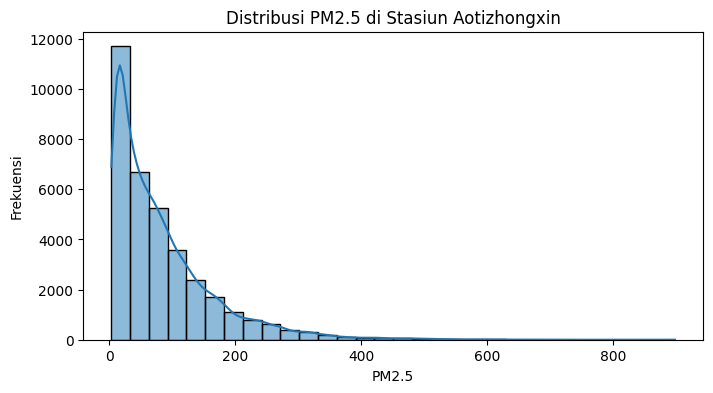

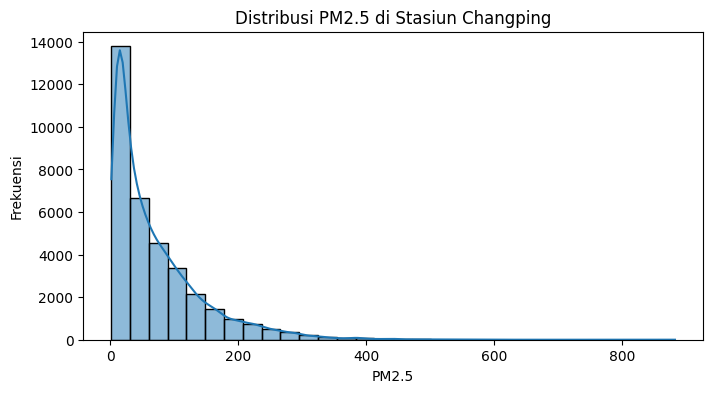

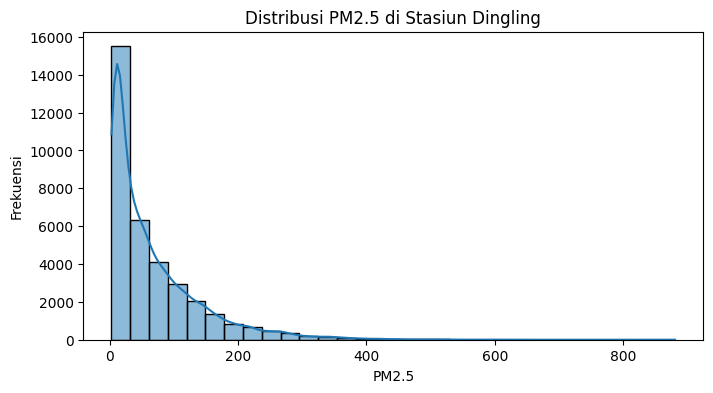

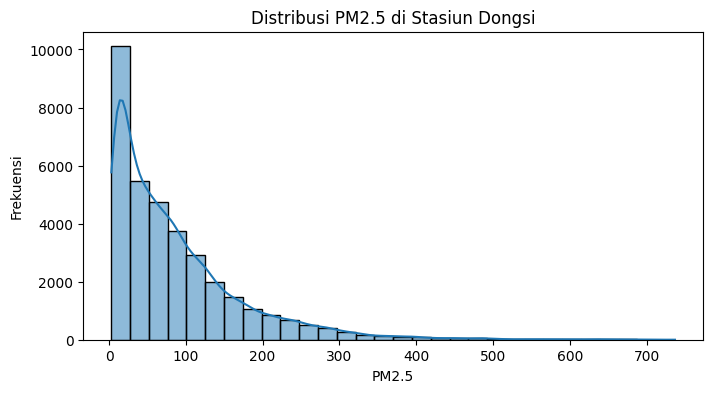

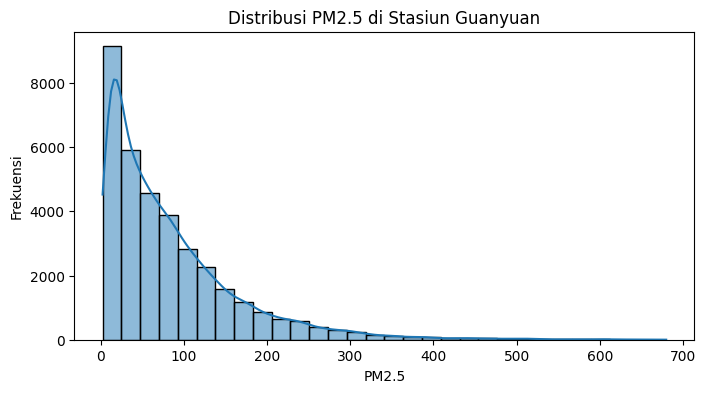

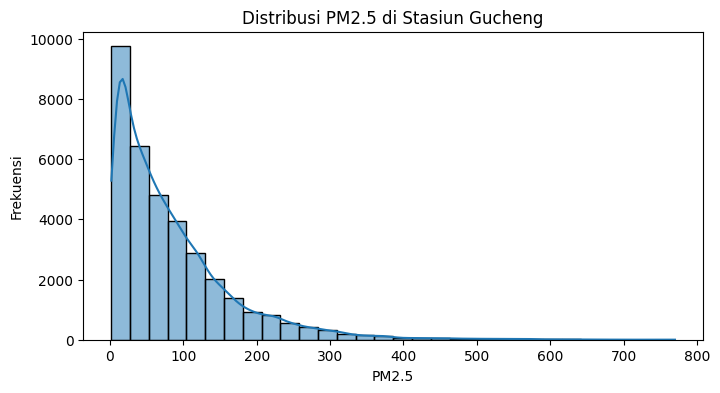

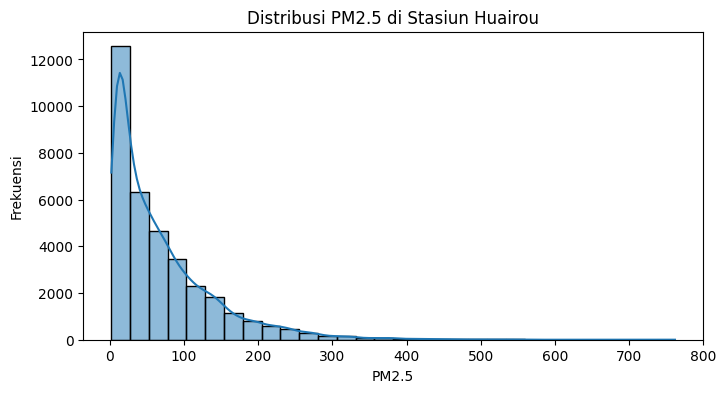

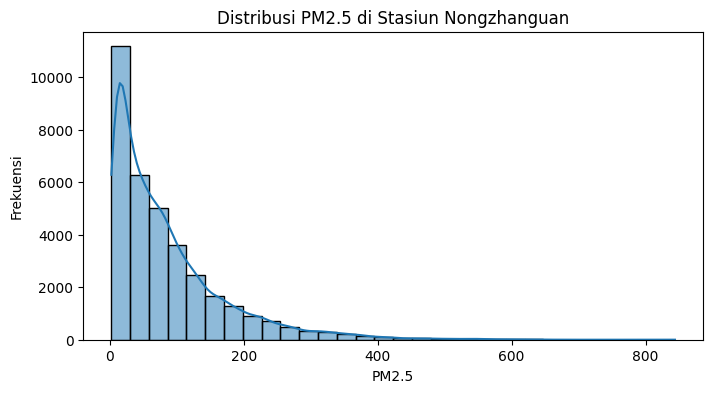

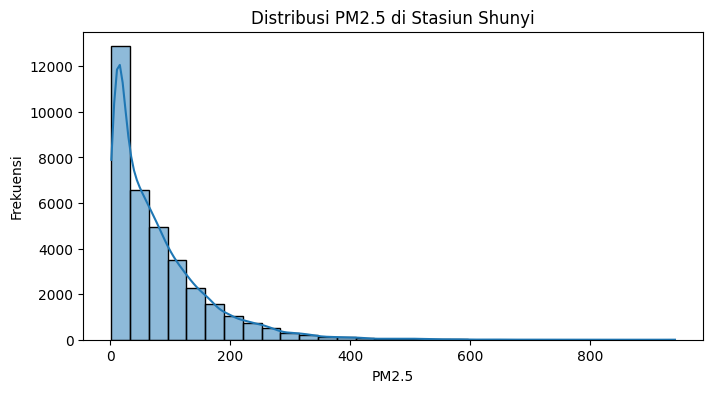

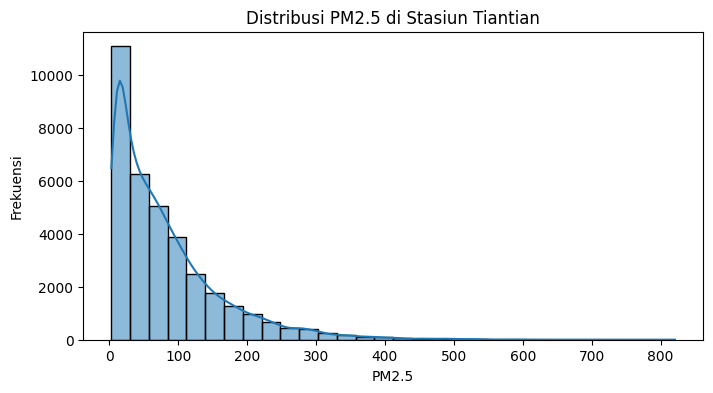

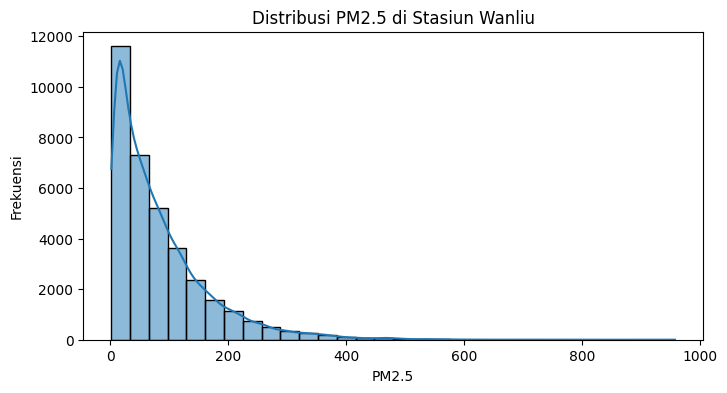

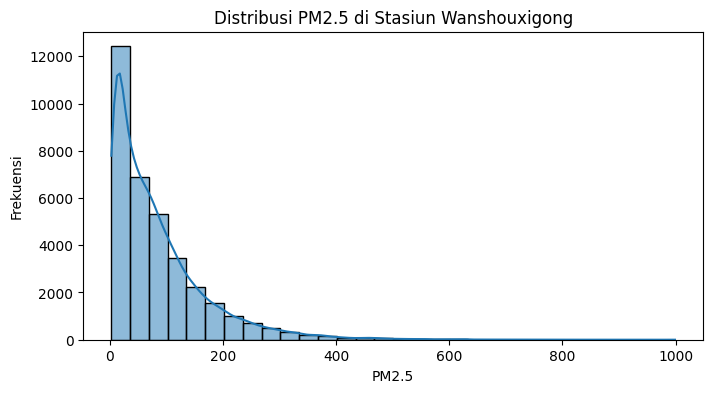

In [118]:
for nama, df in df_dict.items():
    plt.figure(figsize=(8, 4))
    sns.histplot(df["PM2.5"].dropna(), bins=30, kde=True)
    plt.title(f"Distribusi PM2.5 di Stasiun {nama}")
    plt.xlabel("PM2.5")
    plt.ylabel("Frekuensi")
    plt.show()

## Visualization & Explanatory Analysis

#### Rumusan Permasalahan
1. Bagaimana pola distribusi polutan di berbagai lokasi berdasarkan analisis geospasial?
2. Bagaimana pola konsentrasi polutan berdasarkan waktu menggunakan analisis clustering?
3. Bagaimana pengaruh curah hujan terhadap polusi udara?
--- 

In [119]:
df_all = pd.concat([df.assign(Station=nama) for nama, df in df_dict.items()])
df_all.to_csv("dashboard/main_data.csv", index=False, encoding="utf-8")

Insight:
- Menyimpan hasil cleaning dataset ke file main_data.csv agar dapat di proses pada streamlit

### Permasalahan 1 <br> Pola distribusi polutan di berbagai lokasi berdasarkan analisis geospasial

In [120]:
# Data Geospasial (Latitude/Lintang & Longitude/Bujur untuk setiap stasiun)
geo_data = pd.DataFrame({
    "Station": df_dict.keys(),
    "Latitude": [39.95, 40.22, 40.29, 39.93, 39.93, 39.91, 40.32, 39.93, 40.12, 39.99, 39.98, 39.88],
    "Longitude": [116.41, 116.23, 116.22, 116.42, 116.36, 116.30, 116.63, 116.47, 116.66, 116.38, 116.30, 116.35],
})

pollutants = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]
colormaps = ["Reds", "Oranges", "Purples", "Blues", "Greens", "pink"]

# Hitung rata-rata masing-masing polutan di setiap stasiun
for pol in pollutants:
    geo_data[pol] = [df[pol].mean() for df in df_dict.values()]

def scatter_pollutant(pollutant, cmap):
    fig, ax = plt.subplots(figsize=(8, 6))
    scatter = ax.scatter(geo_data["Longitude"], geo_data["Latitude"], 
                         c=geo_data[pollutant], cmap=cmap, s=250, edgecolors='black', alpha=0.8)
    
    for i, row in geo_data.iterrows():
        ax.text(row["Longitude"], row["Latitude"], row["Station"], fontsize=7, ha='left', fontweight="bold")

    cbar = plt.colorbar(scatter, ax=ax)
    cbar.set_label(f"{pollutant}")
    
    ax.set_title(f"Distribusi {pollutant} di Berbagai Lokasi", fontsize=12, fontweight="bold")
    ax.set_xlabel("Longitude (Garis Bujur)")
    ax.set_ylabel("Latitude (Garis Lintang)")
    ax.grid(True, linestyle="--", alpha=0.5)

    plt.show()


Insight:
- Menentukan lokasi spesifik dari setiap stasiun berupa garis lintang dan bujurnya dengan bantuan sumber eksternal (dikarenakan tidak terdapat data mengenai lokasi pada dataset) seperti GMaps. Urutan lokasinya sesuai dengan urutan index pada list. Semisal stasiun Aotizhongxin memiliki garis lintang (33.95) dan garis bujur (116.41), dan seterusnya.
- Menghitung nilai rata-rata untuk setiap polusi pada setiap stasiun.
- Membuat method untuk menampilkan visualisasi persebasaran polutan pada setiap stasiun menggunakan grafik scatter.

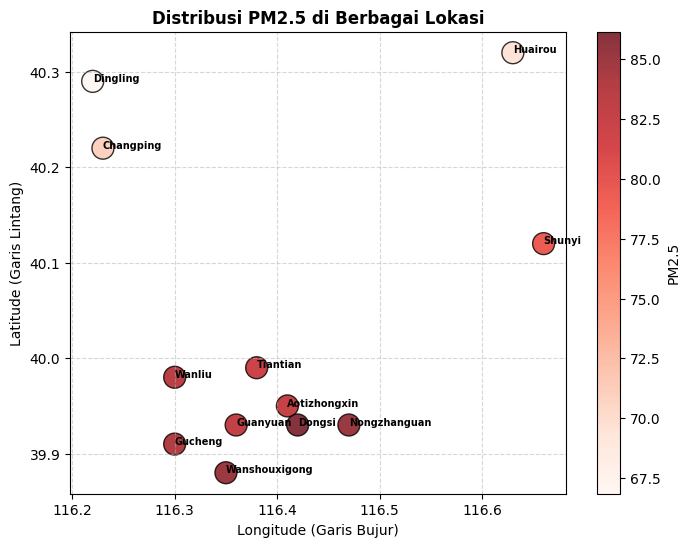

In [121]:
scatter_pollutant("PM2.5", "Reds")

Insight:
- Menampilkan grafik scatter pola persebaran polutan `PM2.5`
- Dapat dilihat, polutan `PM2.5` pada stasiun Dongsi, Wanshouxigong, dan Nongzhanguan terlihat lebih tinggi ketimbang stasiun lainnya. Dan pada stasiun Dingling memiliki tingkat polutan terendah.

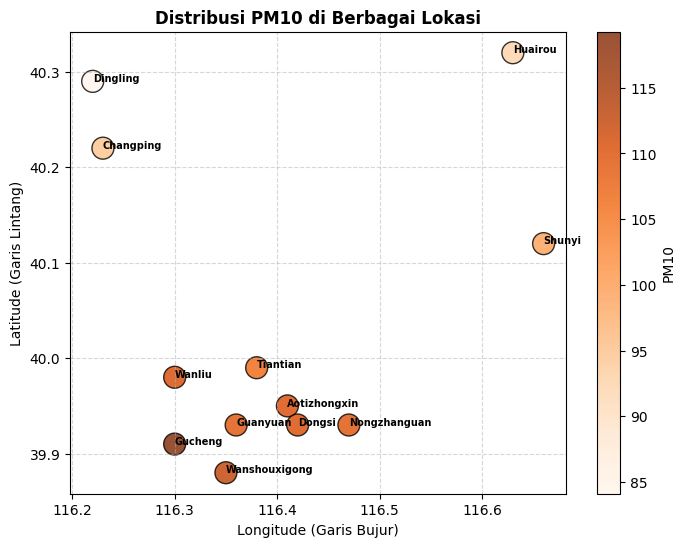

In [122]:
scatter_pollutant("PM10", "Oranges")

Insight:
- Menampilkan grafik scatter pola persebaran polutan `PM10`
- Dapat dilihat, polutan `PM10` pada stasiun Gucheng terlihat lebih tinggi ketimbang stasiun lainnya. Dan pada stasiun Dingling memiliki tingkat polutan terendah.

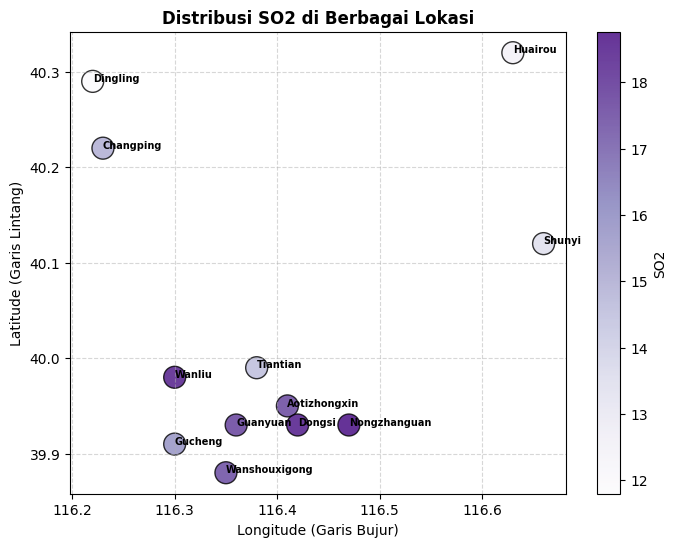

In [123]:
scatter_pollutant("SO2", "Purples")

Insight:
- Menampilkan grafik scatter pola persebaran polutan `SO2`
- Dapat dilihat, polutan `SO2` pada stasiun Dongsi, Wanliu, dan Nongzhanguan terlihat lebih tinggi ketimbang stasiun lainnya. Dan pada stasiun Dingling dan Huairou memiliki tingkat polutan terendah.

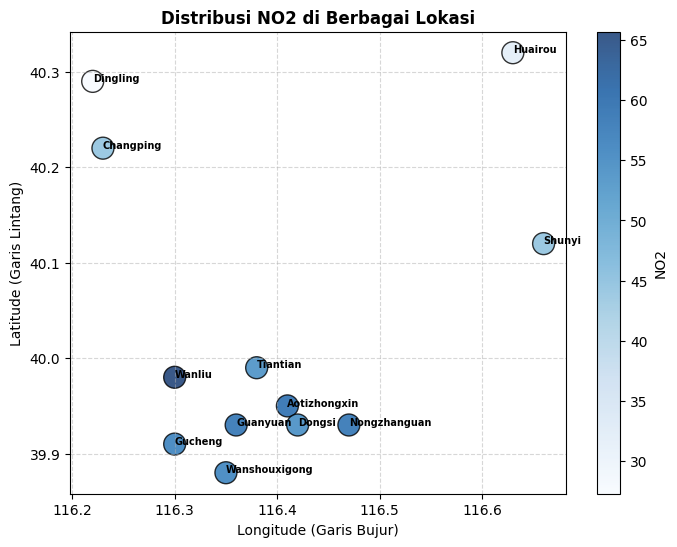

In [124]:
scatter_pollutant("NO2", "Blues")

Insight:
- Menampilkan grafik scatter pola persebaran polutan `NO2`
- Dapat dilihat, polutan `NO2` pada stasiun Wanliu terlihat lebih tinggi ketimbang stasiun lainnya. Dan pada stasiun Dingling memiliki tingkat polutan terendah.

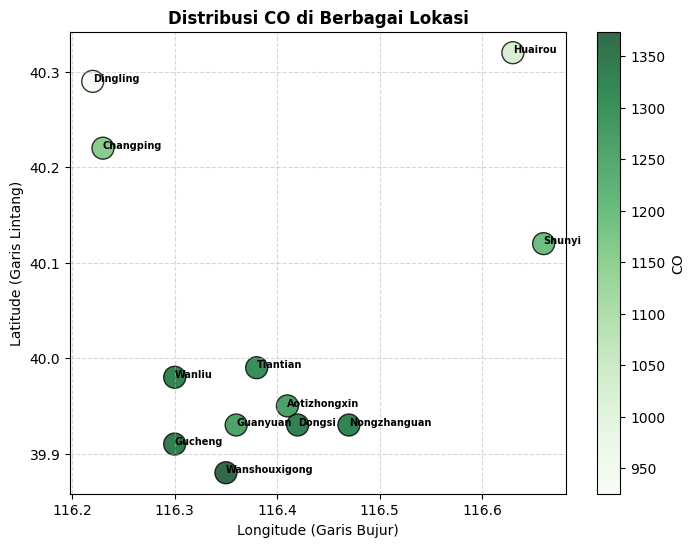

In [125]:
scatter_pollutant("CO", "Greens")

Insight:
- Menampilkan grafik scatter pola persebaran polutan `CO`
- Dapat dilihat, polutan `CO` pada stasiun Dongsi, Wanliu, Nongzhanguan, Wanshouxigong, dan Gucheng terlihat lebih tinggi ketimbang stasiun lainnya. Dan pada stasiun Dingling memiliki tingkat polutan terendah.

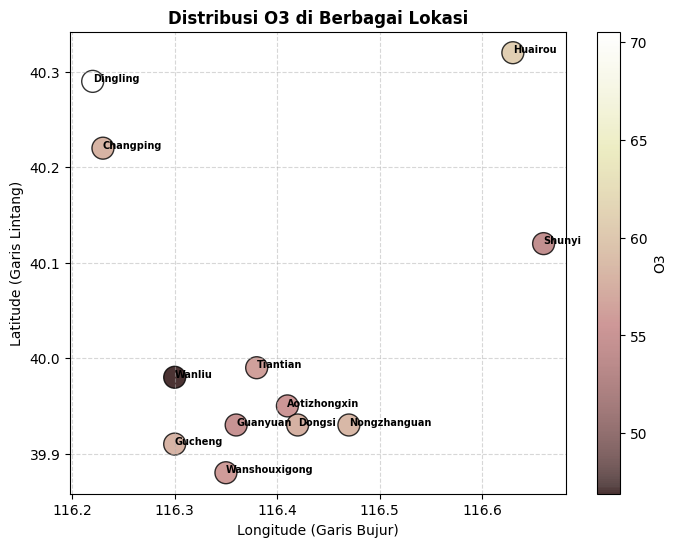

In [126]:
scatter_pollutant("O3", "pink")

Insight:
- Menampilkan grafik scatter pola persebaran polutan `SO2`
- Dapat dilihat, polutan `SO2` pada stasiun Wanliu terlihat lebih tinggi ketimbang stasiun lainnya. Dan pada stasiun Dingling dan Huairou memiliki tingkat polutan terendah.

---

### Permasalahan 2 <br> Pola konsentrasi polutan berdasarkan waktu menggunakan analisis clustering

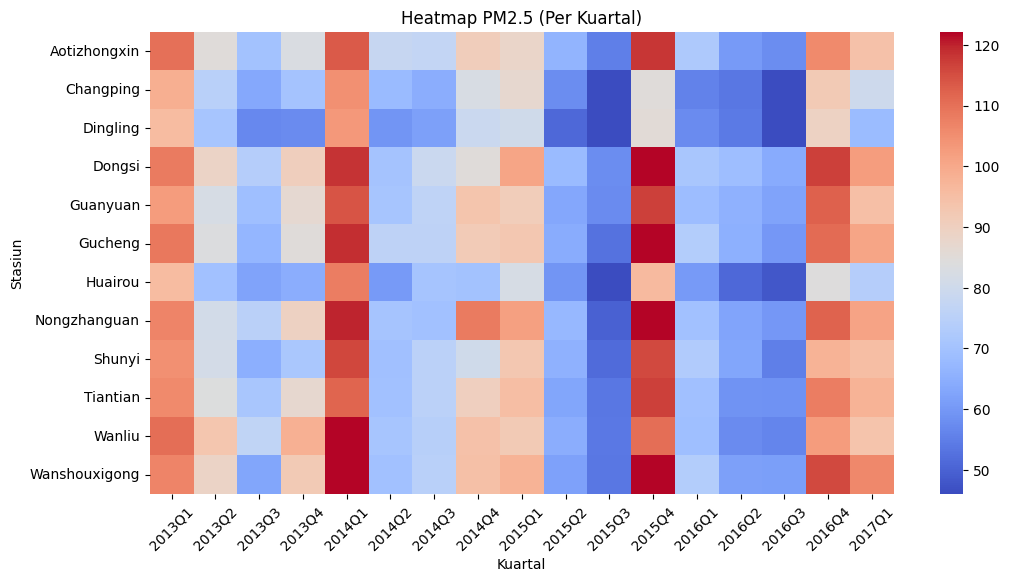

In [127]:
df_all = pd.concat(df_dict.values(), keys=df_dict.keys(), names=['Station'])
df_all = df_all.reset_index()

df_all["datetime"] = pd.to_datetime(df_all[["year", "month", "day", "hour"]])
df_all["quarter"] = df_all["datetime"].dt.to_period("Q")  # Tiap 3 bulan

# Rata-rata PM2.5 tiap stasiun per kuartal atau 3 bulan
df_quarterly = df_all.groupby(["Station", "quarter"])["PM2.5"].mean().unstack(level=0)

plt.figure(figsize=(12, 6))
sns.heatmap(df_quarterly.T, cmap="coolwarm", robust=True)
plt.title("Heatmap PM2.5 (Per Kuartal)")
plt.xlabel("Kuartal")
plt.ylabel("Stasiun")
plt.xticks(rotation=45)
plt.show()


Insight:
- Melakukan clustering/pengelompokan untuk setiap stasiun pada target polutan `PM2.5` untuk menganalisis polanya.
- Dari hasil clustering berupa grafik heatmap, dapat dilihat Stasiun seperti Dingling cenderung memiliki tingkat polutan yang cenderung rendah ketimbang kebanyakan stasiun. Sedangkan stasiun seperti Nongzhanguan memiliki tingkat polutan yang lebih tinggi daripada kebanyakan stasiun.

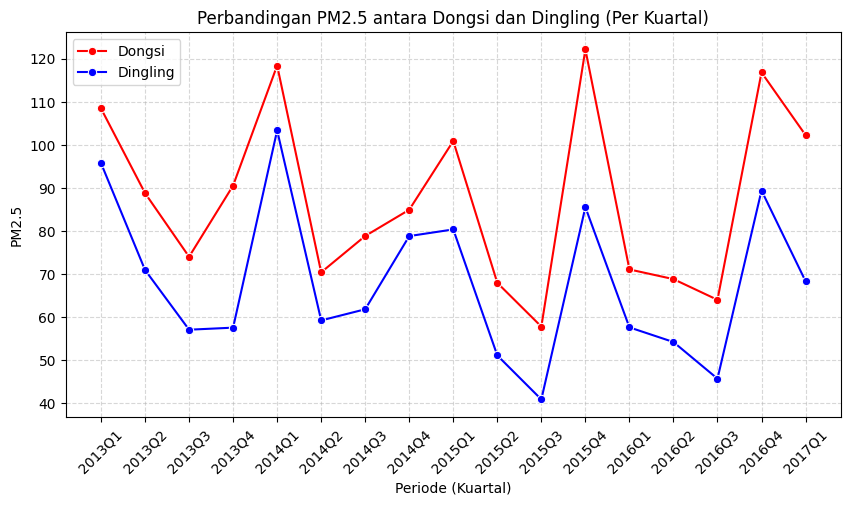

In [128]:
stasiun1 = "Dongsi"
stasiun2 = "Dingling"

# Filter data untuk dua stasiun
df_stasiun1 = df_all[df_all["Station"] == stasiun1].groupby("quarter")["PM2.5"].mean()
df_stasiun2 = df_all[df_all["Station"] == stasiun2].groupby("quarter")["PM2.5"].mean()

# Plot grafik garis
plt.figure(figsize=(10, 5))
sns.lineplot(x=df_stasiun1.index.astype(str), y=df_stasiun1.values, marker="o", label=stasiun1, color="red")
sns.lineplot(x=df_stasiun2.index.astype(str), y=df_stasiun2.values, marker="o", label=stasiun2, color="blue")

# Atur judul dan label
plt.title(f"Perbandingan PM2.5 antara {stasiun1} dan {stasiun2} (Per Kuartal)")
plt.xlabel("Periode (Kuartal)")
plt.ylabel("PM2.5")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.show()

Insight: 
- Melakukan perbandingan side-by-side antara 2 stasiun yang cenderung memiliki tingkat polutan terendah dan tertinggi, yaitu stasiun Dingling dan Dongsi.
- Dapat dilihat kejomplangan antara tingkat polutan dari kedua stasiun tersebut. Pada 2015Q4 merupakan waktu terjadinya tingkat polutan tertinggi untuk stasiun Dongsi dan pada 2015Q3 merupakan waktu dengan tingkat polutan terendah untuk stasiun Dingling dan juga untuk stasiun Dongsi. <br> Kira-kira ada kejadian apa di kuartal tersebut yang menyebabkan kedua stasiun mencapai tingkat polutan terendah dalam rentang waktu dataset ?

---

### Permasalahan 3 <br>  Pengaruh Curah Hujan terhadap Polusi Udara?

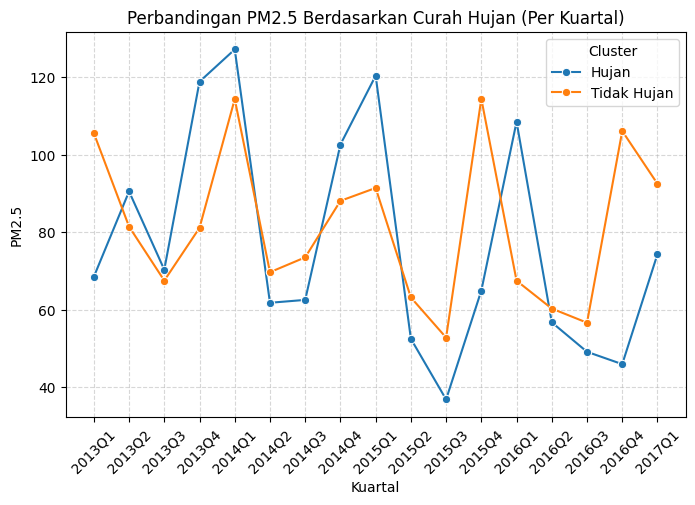

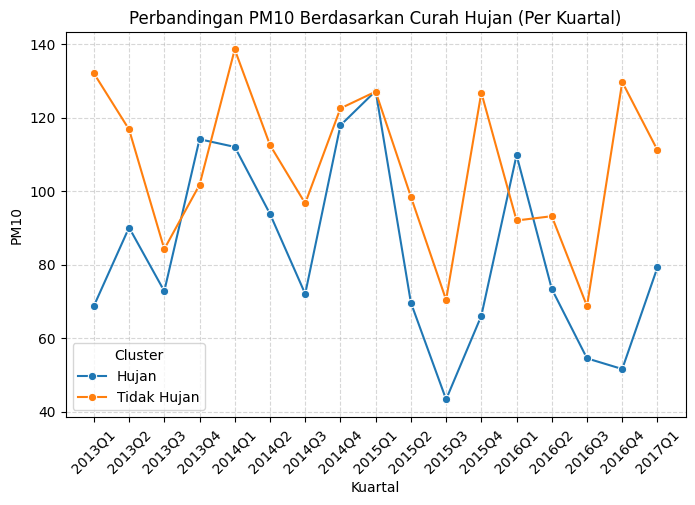

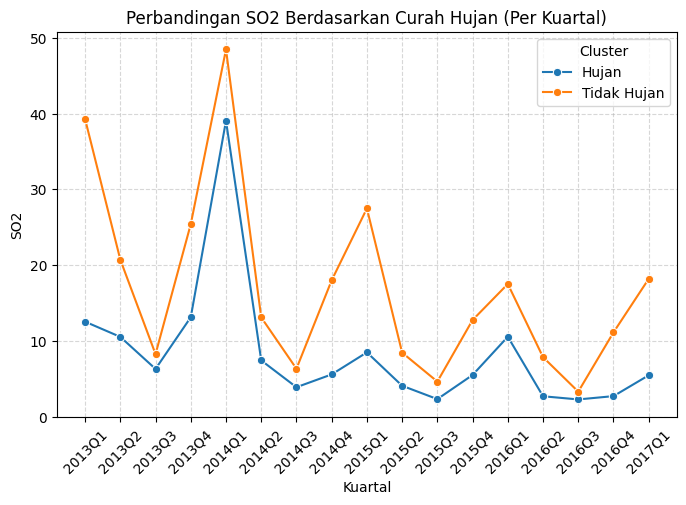

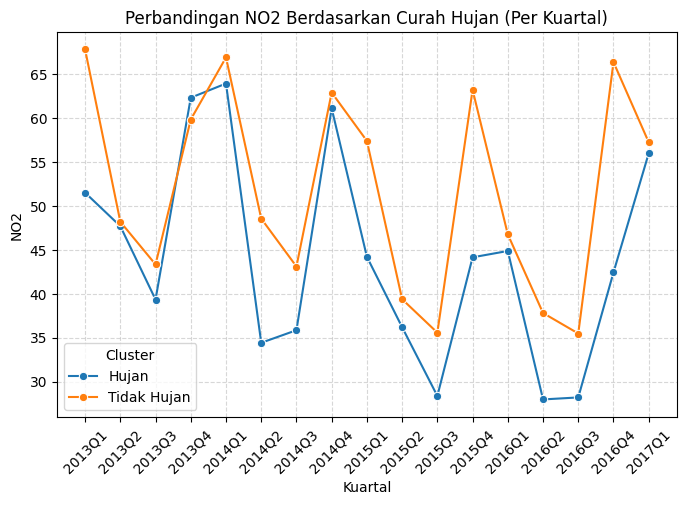

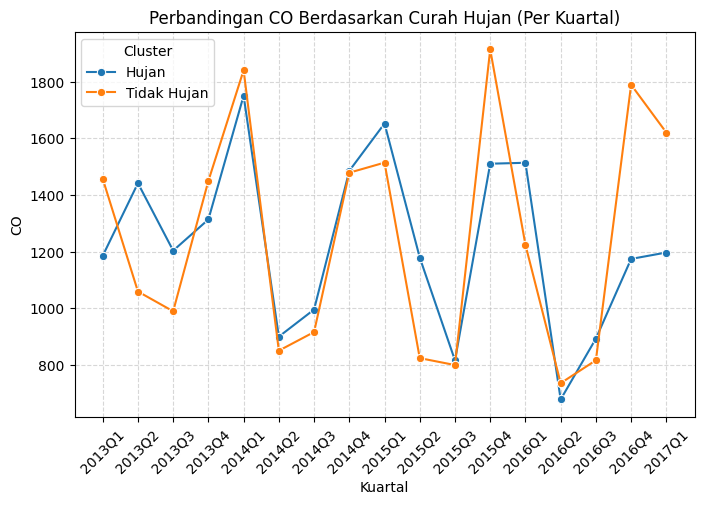

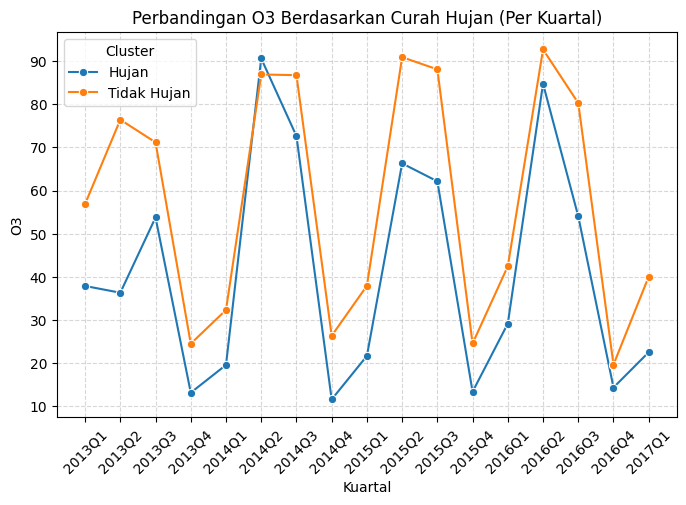

In [143]:
df_all["datetime"] = pd.to_datetime(df_all[["year", "month", "day", "hour"]])
df_all["quarter"] = df_all["datetime"].dt.to_period("Q").astype(str)
df_all["Cluster"] = df_all["RAIN"].apply(lambda x: "Tidak Hujan" if x == 0 else "Hujan")
df_clustered = df_all.groupby(["quarter", "Cluster"])[pollutants].mean().reset_index()

plt.close('all')
for pol in pollutants:
    plt.figure(figsize=(8, 5))
    sns.lineplot(data=df_clustered, x="quarter", y=pol, hue="Cluster", marker="o")
    plt.xticks(rotation=45)
    plt.title(f"Perbandingan {pol} Berdasarkan Curah Hujan (Per Kuartal)")
    plt.xlabel("Kuartal")
    plt.ylabel(pol)
    plt.legend(title="Cluster")
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.show()


Insight:
- Mengimplementasikan teknik clustering terhadap dataset yang mempunyai nilai kolom `RAIN` = 0 dan lebih dari 0 untuk mengetahui apakah ada pengaruhnya curah hujan terhadap pola tren polutan.
- Dari hasil grafik yang terlampir, dapat diambil beberapa kesimpulan:
    1. Terdapat polutan yang memiliki tingkat polusi lebih tinggi pada saat hujan (dataset updated tiap jam) adapula sebaliknya, beberapa polutan memiliki tingkat polusi lebih rendah saat hujan.
    2. Contoh polutan yang tingkat polusinya lebih tinggi pada saat hujan ialah: `PM2.5`, meskipun berdasarkan grafik, peningkatannya cenderung tidak sedrastis itu. Pada rentang 2013Q4 hingga 2015Q1 merupakan titik puncak dari polutan tersebut saat hujan, uniknya setelah rentang waktu tersebut cenderung tidak ada bedanya antara hujan dan tidak hujan, malah terdapat istilahnya 'kejomplangan' data pada 2016Q4.
    3. Selain polutan `PM2.5`, polutan lain cenderung menunjukkan polusi tertinggi masih berada saat curah hujan = 0 atau tidak hujan.

## Conclusion

- Conclusion Pertanyaan 1: Bagaimana pola distribusi polutan di berbagai lokasi berdasarkan analisis geospasial ?
    > Penerapan geospasial pada dataset Air Quality - PRSA menunjukan hasil yang menarik. Dari grafik berupa scatter plot yang terlihat kita dapat melihat persebaran tingkat polusi dari masing-masing polutan untuk setiap stasiun. Contoh kecilnya pada polutan `PM2.5`, dapat dilihat tingkat polutan tertinggi di pegang oleh stasiun Nongzhanguan, disusul oleh Dongsi dan Wanshouxigong. Sedangkan tingkat polutan terendah dipegang oleh stasiun Dingling. untuk polutan lain juga memiliki hasil yang beragam, tetapi dari sekian banyak polutan, stasiun Dingling menunjukkan hasil yang konsisten bahwa stasiun tersebut memiliki tingkat polutan terendah daripada stasiun lainnya di berbagai simulasi tipe polutan.

- Conclusion Pertanyaan 2: Bagaimana pola konsentrasi polutan berdasarkan waktu menggunakan analisis clustering ?
    > Dari hasil penelitian dengan menggunakan 2 grafik untuk menampilkan pola tren konsentrasi polutan untuk semua stasiun dan perbandingan antar 2 stasiun. Pada perbandingan semua stasiun dengan menggunakan heatmap, dapat diambil garis kasarnya bahwa stasiun seperti Nongzhanguan, Dongsi, dan Wanliu memiliki tingkat polutan `PM2.5` yang cukup tinggi, atau bisa dikatakan sebagai 'Top Three' stasiun dengan tingkat polutan `PM2.5` tertinggi. Sedangkan stasiun Dingling menampilkan hasil yang konsisten di setiap waktu (sepanjang dataset) sebagai stasiun dengan tingkat polutan `PM2.5` terendah. Sedangkan untuk grafik lineplot perbandingan antar 2 stasiun, dapat digunakan jika ingin membandingkan bagaimana persebaran tingkat polutan antar 2 stasiun dalam rentang waktu pada dataset. Simpelnya sebagai pembanding dan menampilkan lebih detil mengenai tren tingkat polutannya.

- Conclusion Pertanyaan 3: Bagaimana pengaruh curah hujan terhadap polusi udara ?
    > Pada pertanyaan kali ini, ingin membuktikan pengaruh curah hujan terhadap tren tingkat polutan. Didapat hasil, curah hujan berpengaruh dalam tren tingkat polutan. Bisa diambil kasus dari polutan `PM2.5` yang memberikan grafik tingkat polutan yang lebih tinggi pada saat hujan ketimbang tidak hujan, meskipun itu terjadi di rentang waktu tertentu, yaitu pada 2013Q4 hingga 2015Q1. Sedangkan kebanyakan tipe polutan lain menunjukkan hasil yang lebih tinggi pada saat tidak hujan. 